In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lib.residental_data_source import ResidentialDataSource


## Создание датасета

В файле converter.py

In [3]:
data_source = ResidentialDataSource('src/dataset.xlsx')
data_set = data_source.fetch_data_set()

In [4]:
data_set.head()

,Unnamed: 0.1,Unnamed: 0,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,...,Есть квартиры без отделки,Есть квартиры с черновой отделкой,Есть квартиры с чистовой отделкой,Есть квартиры под ключ,Закрытая территория,Видеонаблюдение во дворе,Есть площадки для собак,Есть велопарковка,Внутренний двор без машин,Дата сбора информации
0,0,253,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,...,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да,22.12.2021
1,1,254,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,...,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да,22.12.2021
2,2,255,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,...,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да,22.12.2021
3,3,256,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,...,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да,22.12.2021
4,4,257,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,...,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да,22.12.2021


In [5]:
ds = data_set.copy()

columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'Продано квартир, м2', 'Продано квартир, руб', 'Unnamed: 17', 'Дата получения РС', 'Дата публикации ИНС', 'Дата сбора информации' ]
ds.drop(columns=columns_to_drop, inplace=True)

print('Размер выборки: {}, {}'.format(ds.shape[0], ds.shape[1]))
ds.head()

Размер выборки: 1607, 107


,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Тип фасада,Есть квартиры без отделки,Есть квартиры с черновой отделкой,Есть квартиры с чистовой отделкой,Есть квартиры под ключ,Закрытая территория,Видеонаблюдение во дворе,Есть площадки для собак,Есть велопарковка,Внутренний двор без машин
0,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Апрель 2021,0.0,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
1,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Май 2021,0.0,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
2,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июнь 2021,0.0,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
3,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Июль 2021,0.0,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
4,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Август 2021,1.0,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да


In [6]:
num_zero_targets = (ds['Таргет'] == 0).sum()
num_zero_targets

581

In [8]:
ds = ds[ds['Таргет'] != 0]
ds.shape


(1026, 107)

In [10]:
num_null_targets = ds['Таргет'].isna().sum()
num_null_targets

0

## Разведочный анализ данных


## Data Preparation

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 4 to 1606
Columns: 107 entries, Регион to Внутренний двор без машин
dtypes: float64(19), int64(38), object(50)
memory usage: 865.7+ KB


In [12]:
ds[ds.duplicated()]

,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Тип фасада,Есть квартиры без отделки,Есть квартиры с черновой отделкой,Есть квартиры с чистовой отделкой,Есть квартиры под ключ,Закрытая территория,Видеонаблюдение во дворе,Есть площадки для собак,Есть велопарковка,Внутренний двор без машин


### Обработка типов данных

In [13]:
ds.dtypes

Регион                       object
Населенный пункт             object
Группа компаний              object
ID проекта                    int64
Проект                       object
                              ...  
Закрытая территория          object
Видеонаблюдение во дворе     object
Есть площадки для собак      object
Есть велопарковка            object
Внутренний двор без машин    object
Length: 107, dtype: object

### Подозрительные типы данных:

### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Общая площадь квартир                                | <span style="color:blue">object</span>   |
| Общая площадь земельного участка                     | <span style="color:blue">object</span>   |



### изменить на float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Широта                                                | <span style="color:blue">float64</span>  |
| Долгота                                               | <span style="color:blue">object</span>   |

### проверить уникальные, изменить на int/float

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Расстояние по навигатору до: Луговая                  | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Центр                    | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Первая речка             | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Вторая речка             | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Третья рабочая           | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Окатовая                 | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Баляева                  | <span style="color:blue">float64</span>  |
| Расстояние по навигатору до: Кампус ДВФУ              | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: Артем                    | <span style="color:blue">int64</span>    |
| Расстояние по навигатору до: В-надеждинское           | <span style="color:blue">int64</span>    |

### проверить уникальные

| Данные                                               | Тип данных                               |
|------------------------------------------------------|------------------------------------------|
| Вид из окна на море                                   | <span style="color:blue">float64</span>  |


In [14]:
float_col =  ['Общая площадь квартир', 'Общая площадь земельного участка']
for col in float_col:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')


In [15]:
ds['Долгота'] = ds['Долгота'].astype('float64')

In [16]:
int_float_columns = {
        'Расстояние по навигатору до: Луговая': 'int64',
        'Расстояние по навигатору до: Центр': 'float64',
        'Расстояние по навигатору до: Первая речка': 'float64',
        'Расстояние по навигатору до: Вторая речка': 'int64',
        'Расстояние по навигатору до: Третья рабочая': 'float64',
        'Расстояние по навигатору до: Окатовая': 'int64',
        'Расстояние по навигатору до: Баляева': 'float64',
        'Расстояние по навигатору до: Кампус ДВФУ': 'int64',
        'Расстояние по навигатору до: Артем': 'int64',
        'Расстояние по навигатору до: В-надеждинское': 'int64'
    }
for col in int_float_columns:
    print(ds[col].value_counts())

Расстояние по навигатору до: Луговая
4     178
5     149
10    148
9     115
3      70
6      69
8      60
19     33
35     32
55     25
25     20
16     19
2      18
33     18
12     11
1      10
27      9
45      8
15      7
14      7
24      6
28      6
21      5
20      3
Name: count, dtype: int64
Расстояние по навигатору до: Центр
10.0    216
9.0     125
11.0    109
12.0     90
6.0      79
13.0     66
7.0      42
14.0     38
2.0      36
18.0     33
29.0     28
5.0      27
49.0     25
27.0     18
28.0     15
4.0      12
8.0      10
16.0      9
26.0      8
39.0      8
3.0       8
25.0      7
19.0      5
24.0      5
33.0      4
2.5       3
Name: count, dtype: int64
Расстояние по навигатору до: Первая речка
8.0     174
9.0     123
7.0     117
10.0    115
6.0      77
4.0      66
14.0     46
13.0     44
2.0      36
15.0     33
5.0      32
11.0     29
27.0     28
42.0     25
24.0     18
25.0     15
23.0     15
36.0      8
1.0       8
17.0      5
21.0      5
29.0      4
0.4       3
Name: 

### Замечание: почти все значения расстояний - это целые значения. Тогда приведем к типу данных int64 все колонки из списка.

In [17]:
int_columns = {
    'Расстояние по навигатору до: Центр': 'float64',
    'Расстояние по навигатору до: Первая речка': 'float64',
    'Расстояние по навигатору до: Третья рабочая': 'float64',
    'Расстояние по навигатору до: Баляева': 'float64'
}

for col in int_columns:
    ds[col] = ds[col].astype('int64')

### Исследование пропущенных значений

<Axes: >

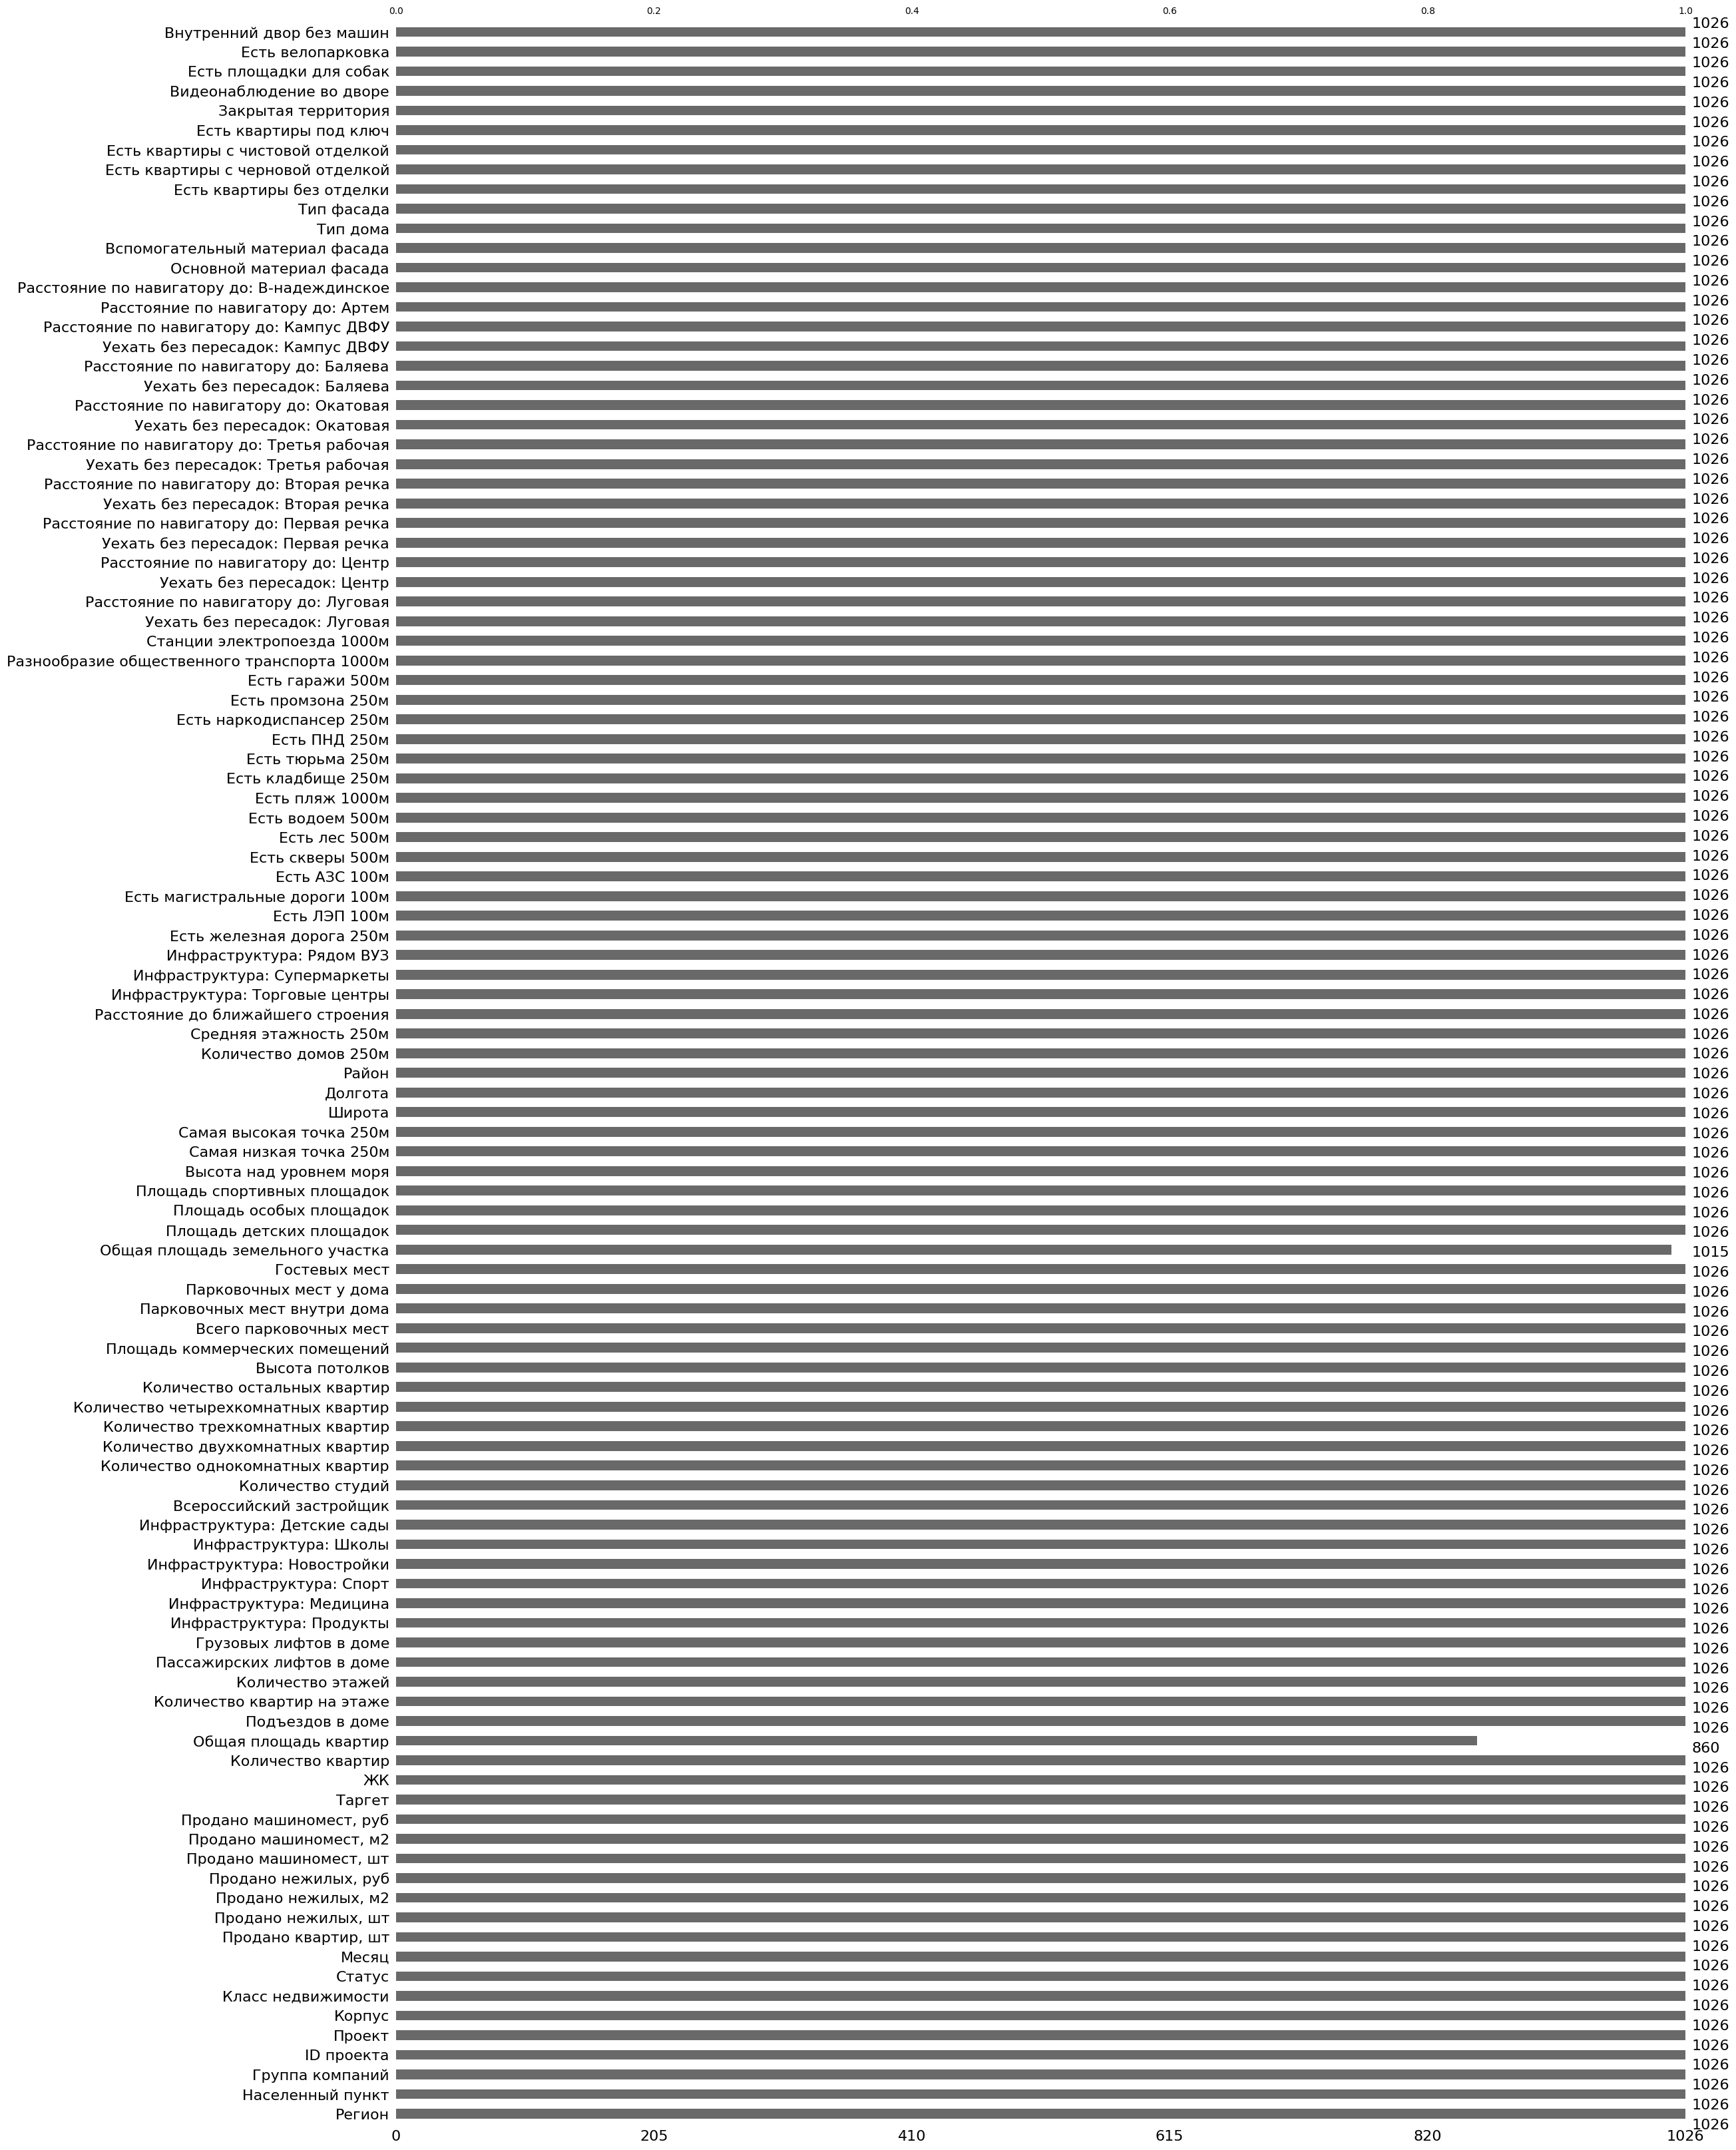

In [18]:
msno.bar(ds)

<Axes: >

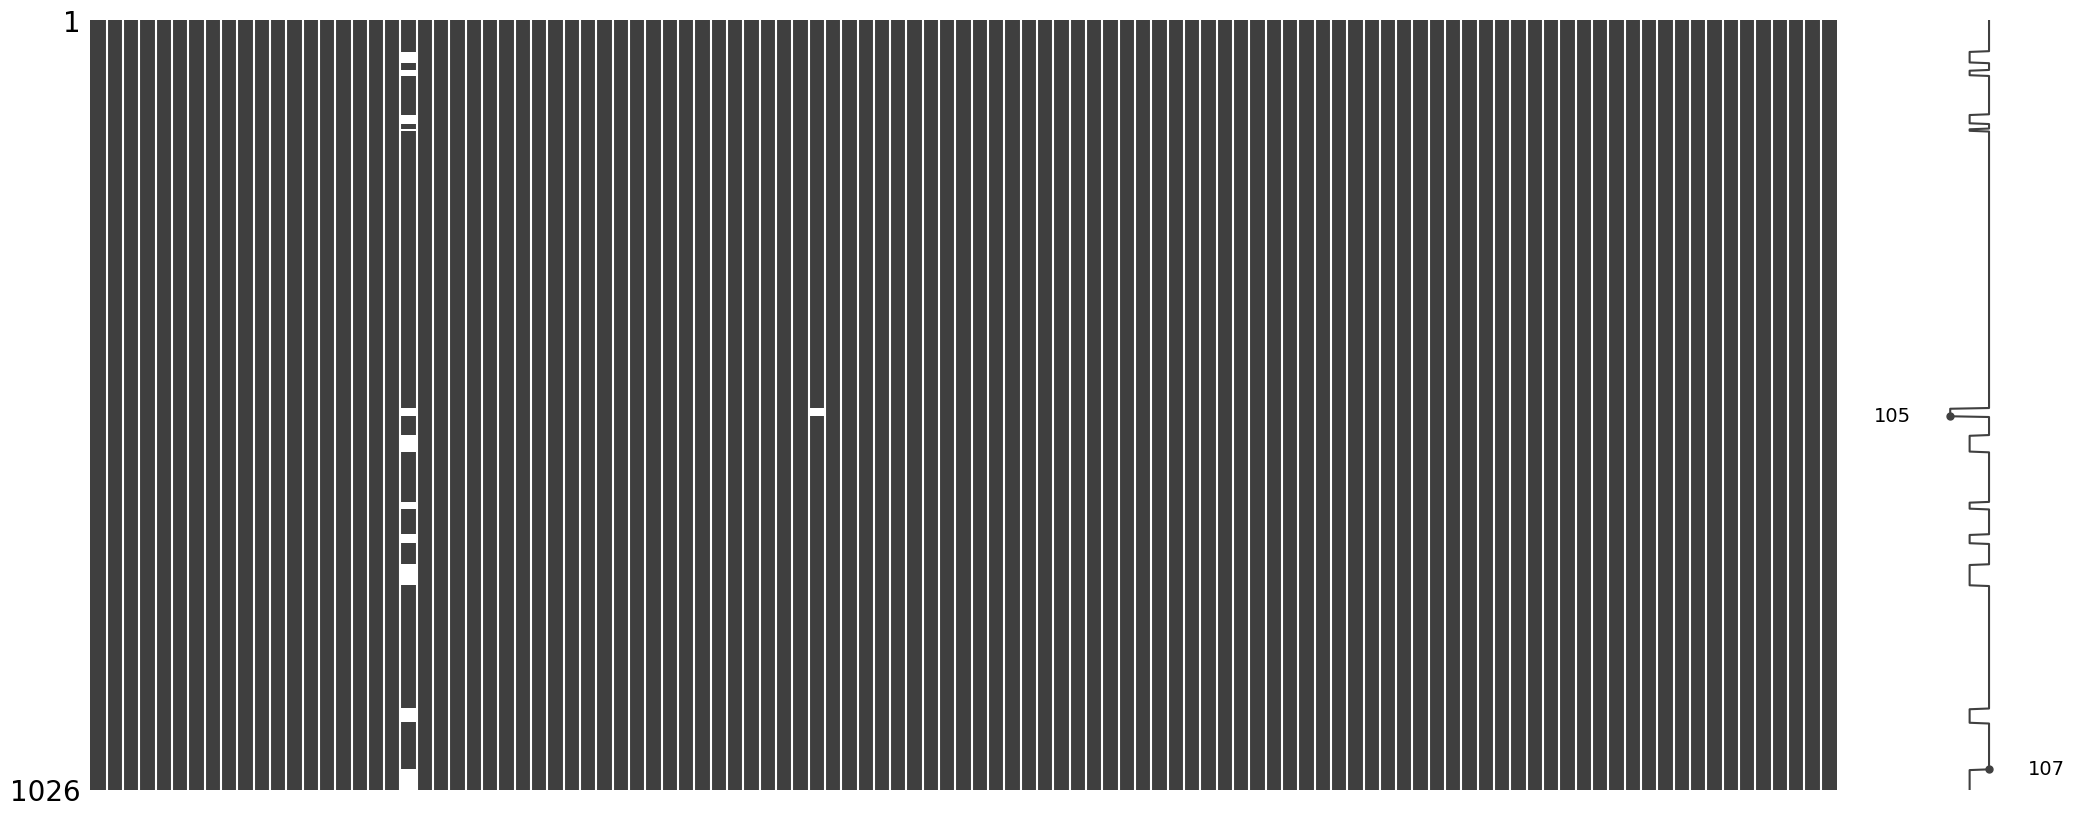

In [19]:
msno.matrix(ds)

In [20]:
# Процент пропущенных значений в каждом столбце

def missing_values(data_set):
    missing_values = (data_set.isna().sum() / len(data_set) * 100).sort_values()
    missing_values_df = pd.DataFrame(missing_values)
    pd.set_option('display.max_rows', len(missing_values_df))
    return missing_values_df

missing_values(ds)

,0
Регион,0.000000
Расстояние по навигатору до: Луговая,0.000000
Уехать без пересадок: Луговая,0.000000
Станции электропоезда 1000м,0.000000
Разнообразие общественного транспорта 1000м,0.000000
Есть гаражи 500м,0.000000
Есть промзона 250м,0.000000
Есть наркодиспансер 250м,0.000000
Есть ПНД 250м,0.000000
Есть тюрьма 250м,0.000000


In [21]:
def useful_rows(df):
    print('Полность заполненные объекты: ', len(df.dropna()))
    print('Процент полностью заполненных объектов: ', round(len(df.dropna()) / len(df) * 100, 2))

useful_rows(ds)

Полность заполненные объекты:  860
Процент полностью заполненных объектов:  83.82


In [22]:
for col in ds.columns:
    count_nan = ds[col].isna().sum()
    if count_nan > 0:
        print(f'{col} : {count_nan}')

Общая площадь квартир : 166
Общая площадь земельного участка : 11


### Краткий вывод

Большинство столбцов заполнено: 860 из 1026 ~ 83%.  


Пропуски наблюдаются только в столбцах со значением площадей.

##  Data Cleaning 



In [23]:
# Функция для визуализации гистограммы и boxplot

def visualize_distribution(dataset, columns, target):

    for col in columns:
        
        plt.figure(figsize=(20, 5))
        
        # Гистограмма и KDE
        plt.subplot(1, 3, 1)
        sns.histplot(dataset[col], kde=True, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Частота', fontsize=12)

        plt.subplot(1, 3, 2)
        sns.boxplot(x=dataset[col], color='lightyellow')
        plt.xlabel(col, fontsize=12)
        
        # Barplot 
        plt.subplot(1, 3, 3)
        sns.barplot(x=dataset[col], y=dataset[target], color='lightgreen')
        plt.xlabel(col, fontsize=12)
        plt.ylabel(target , fontsize=12)

        plt.tight_layout()
        plt.show()

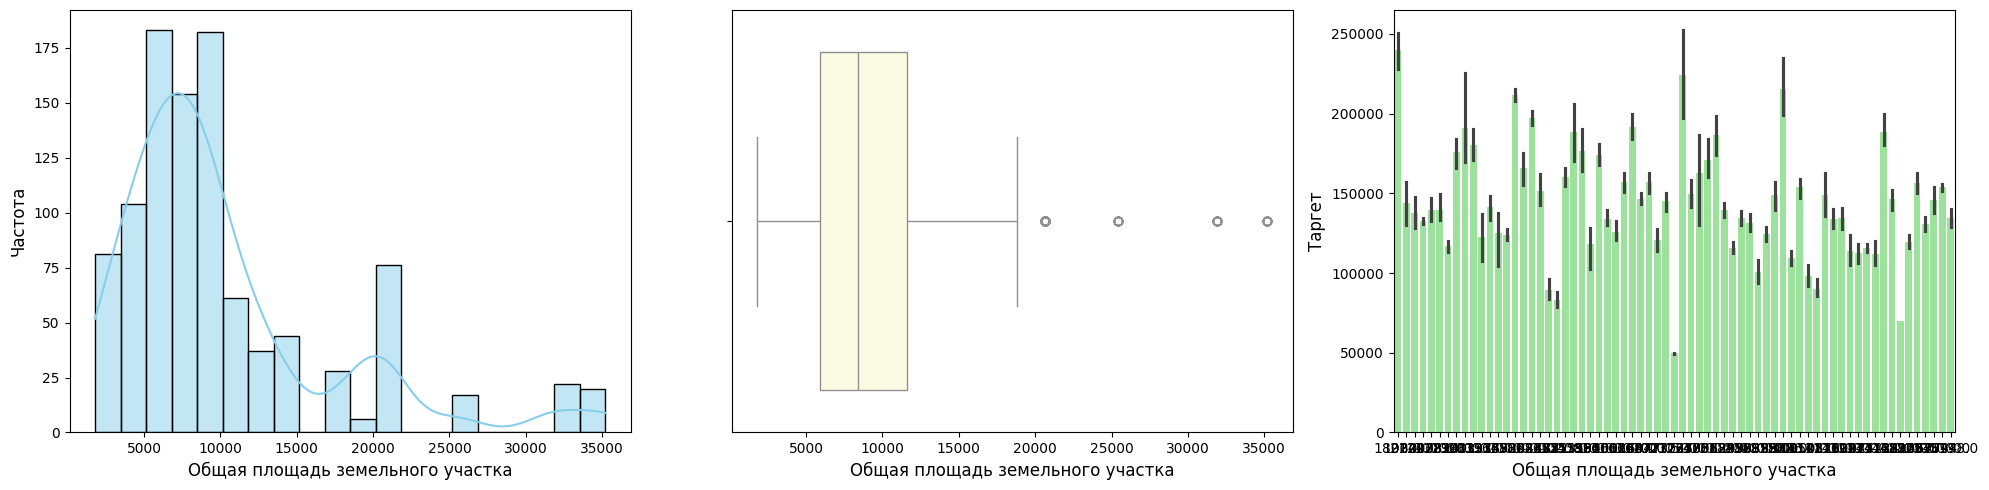

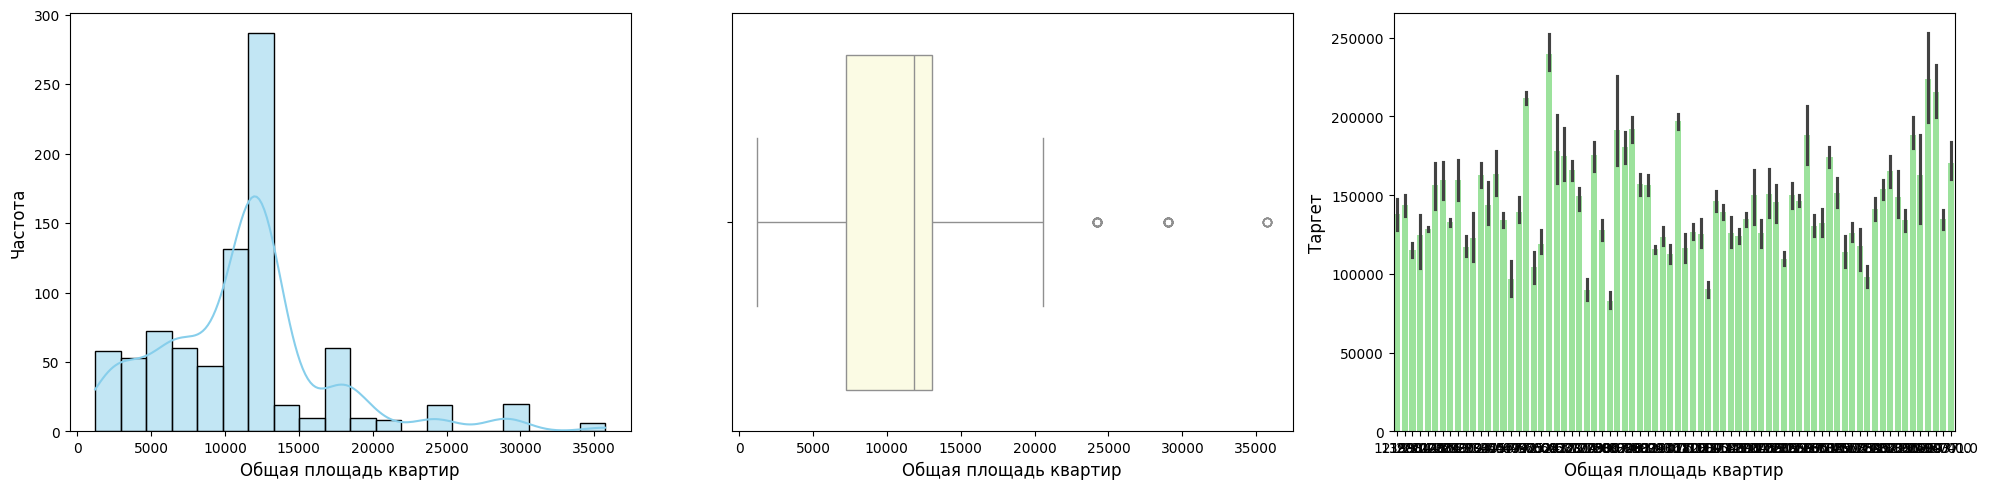

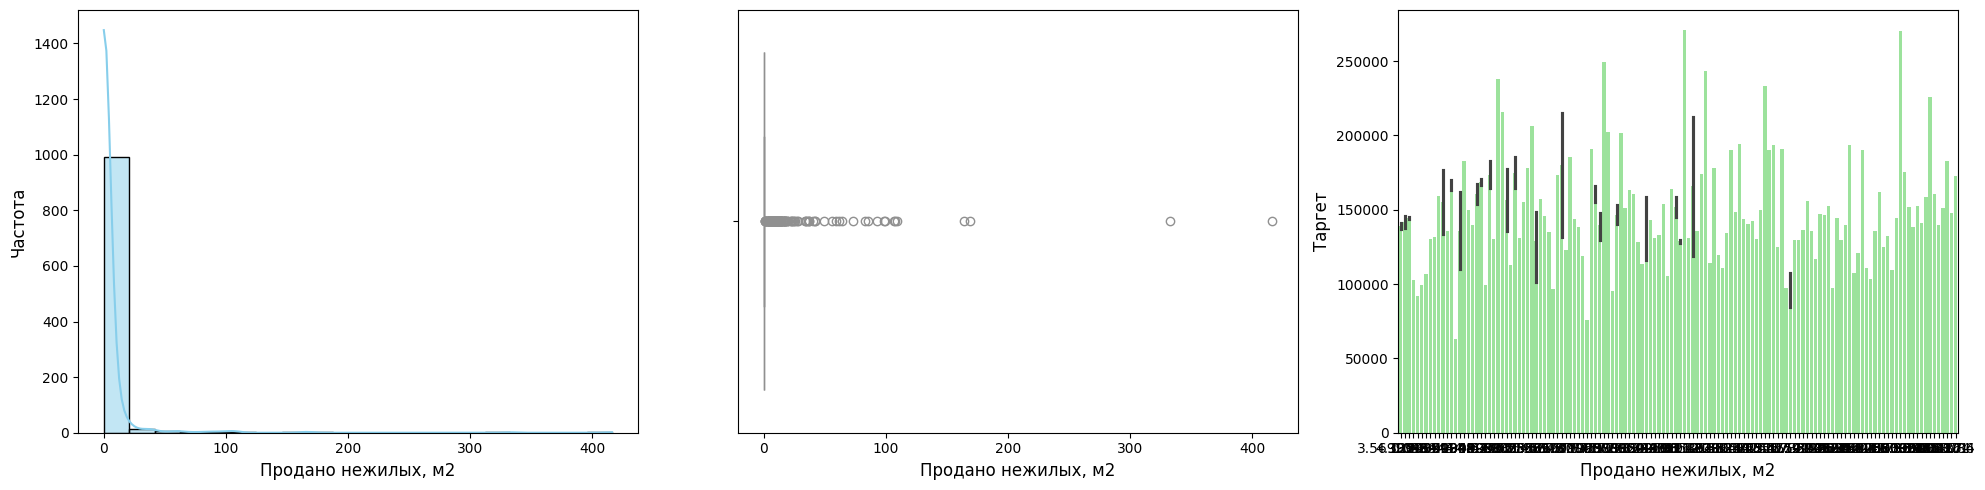

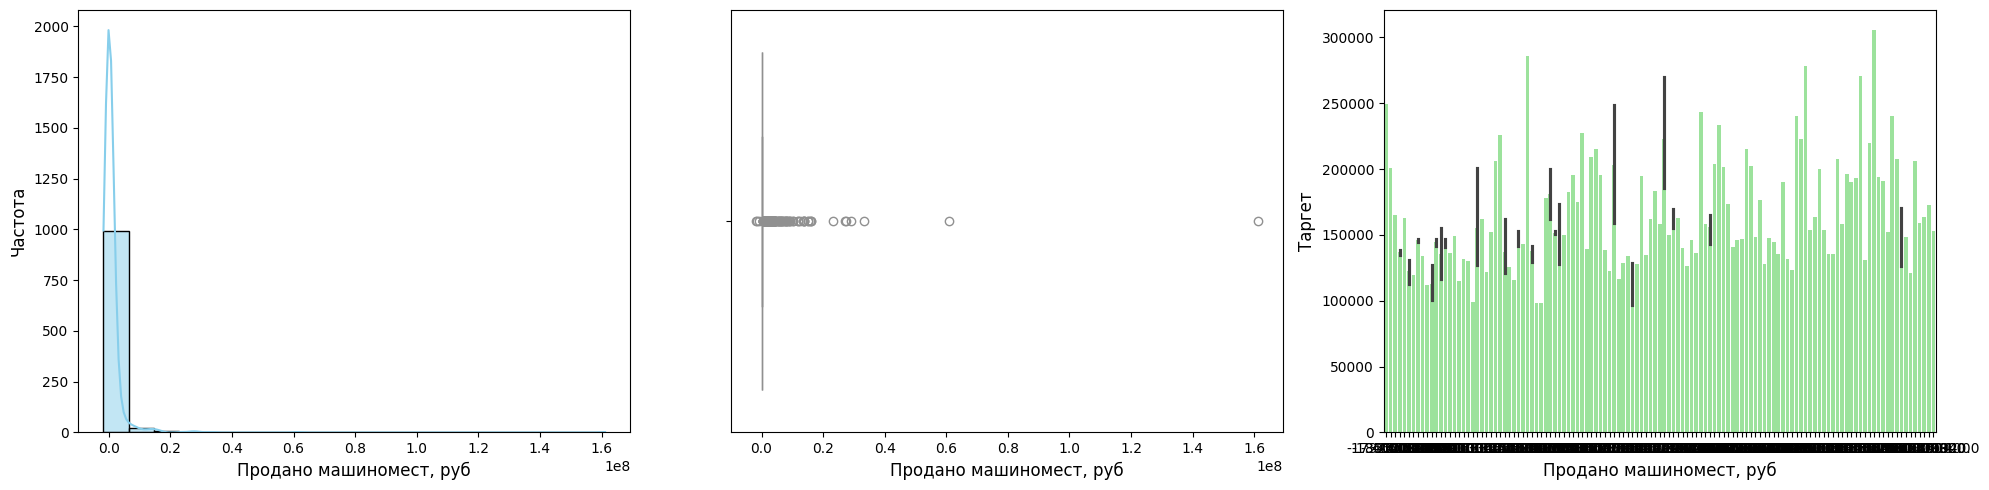

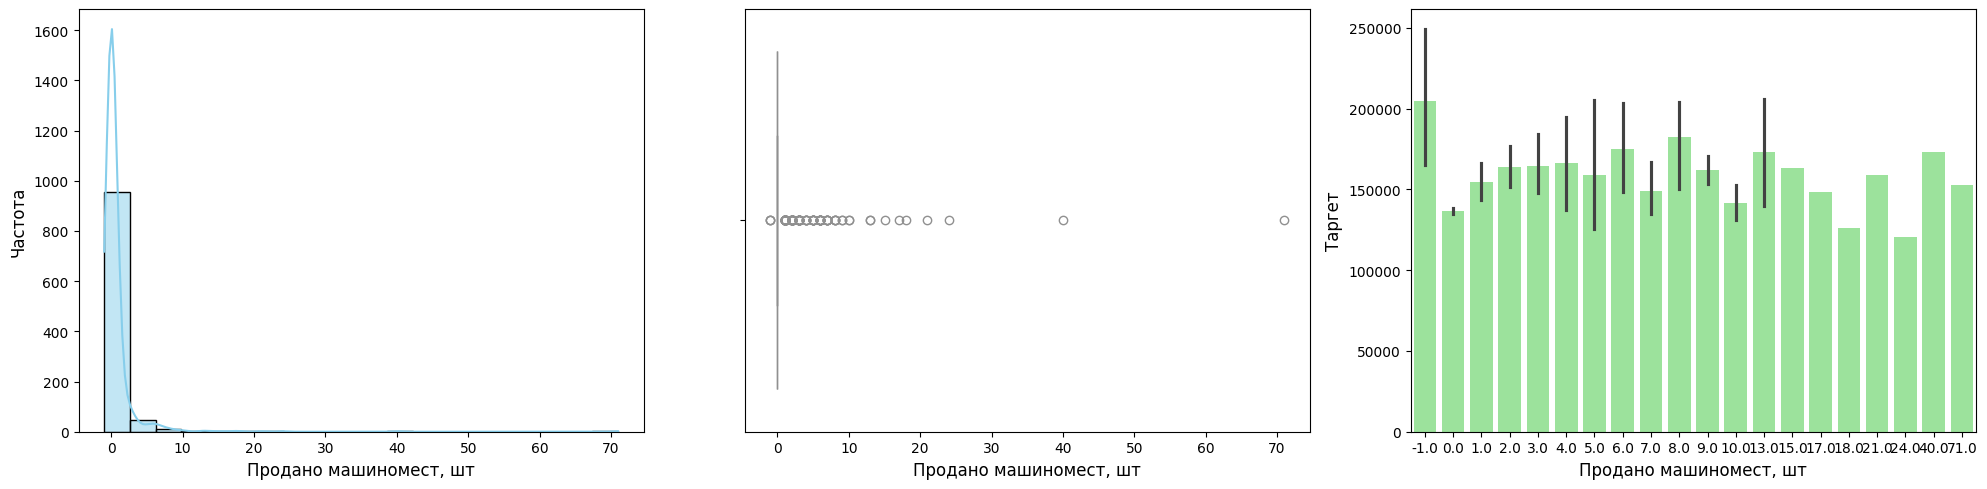

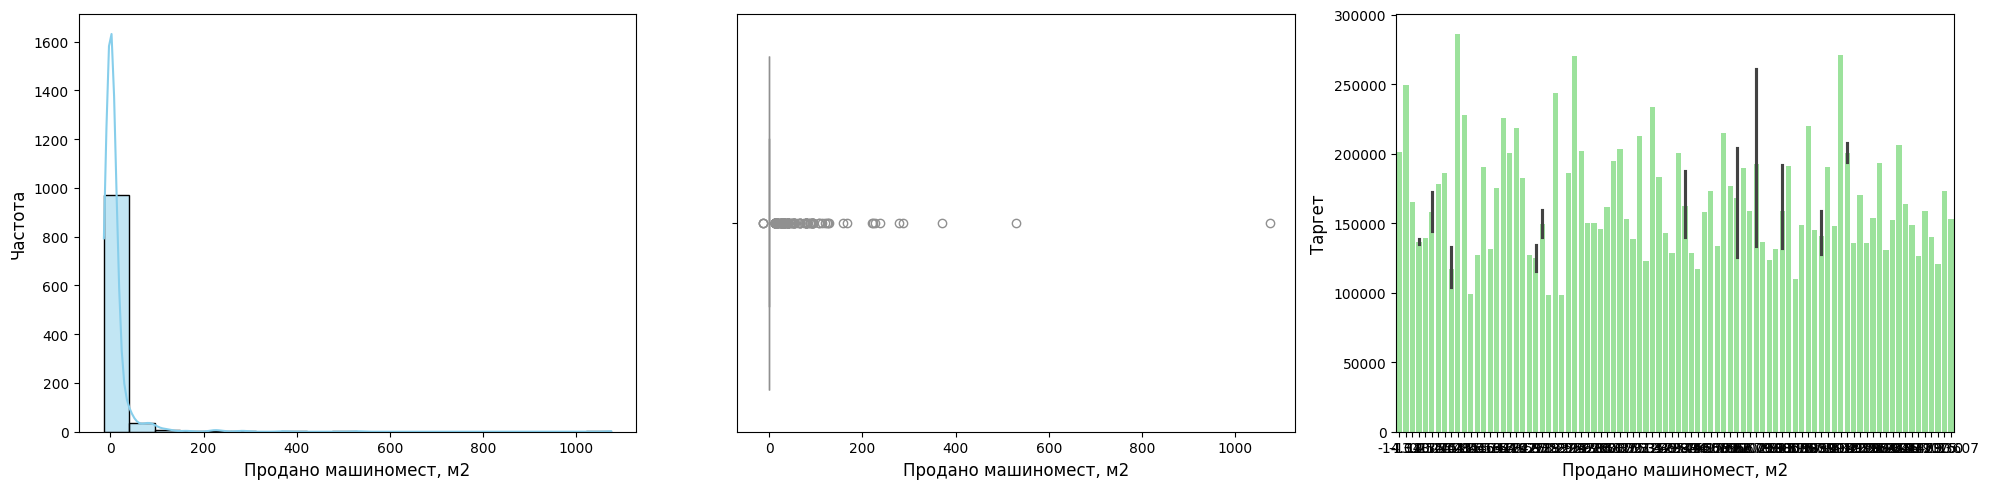

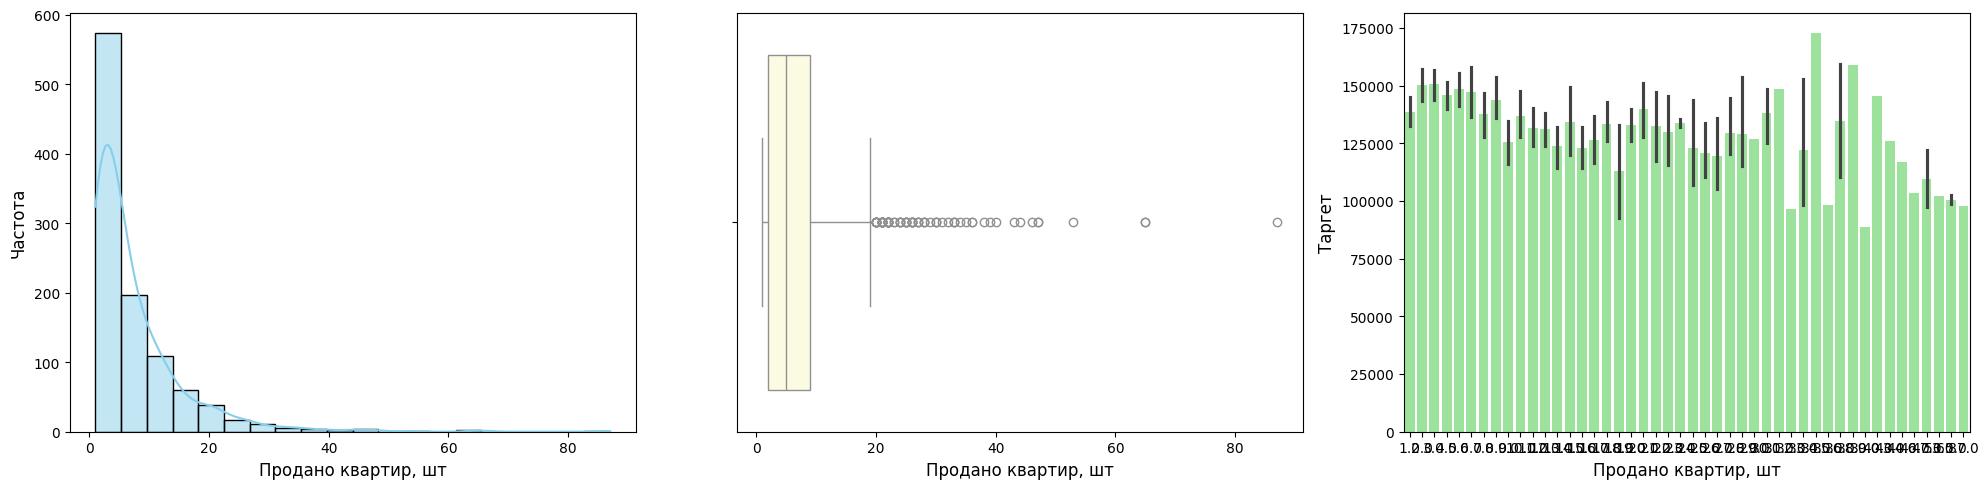

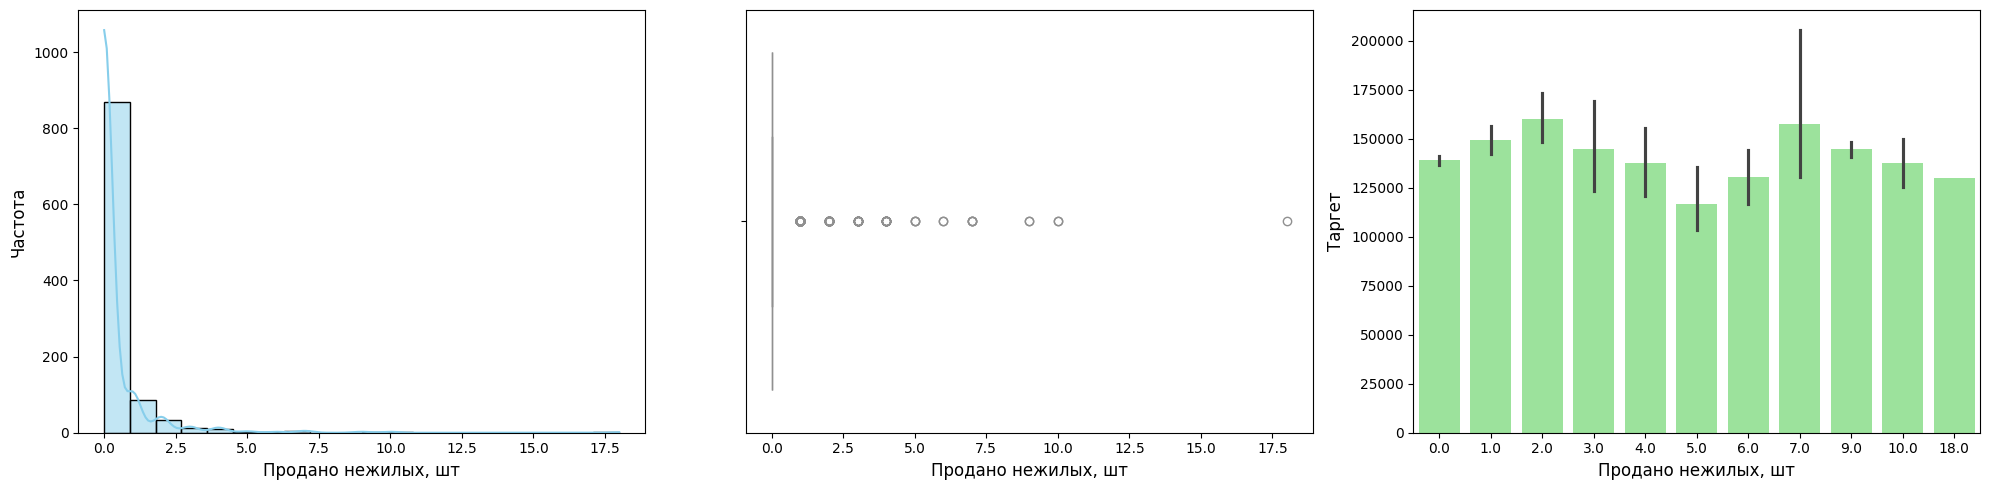

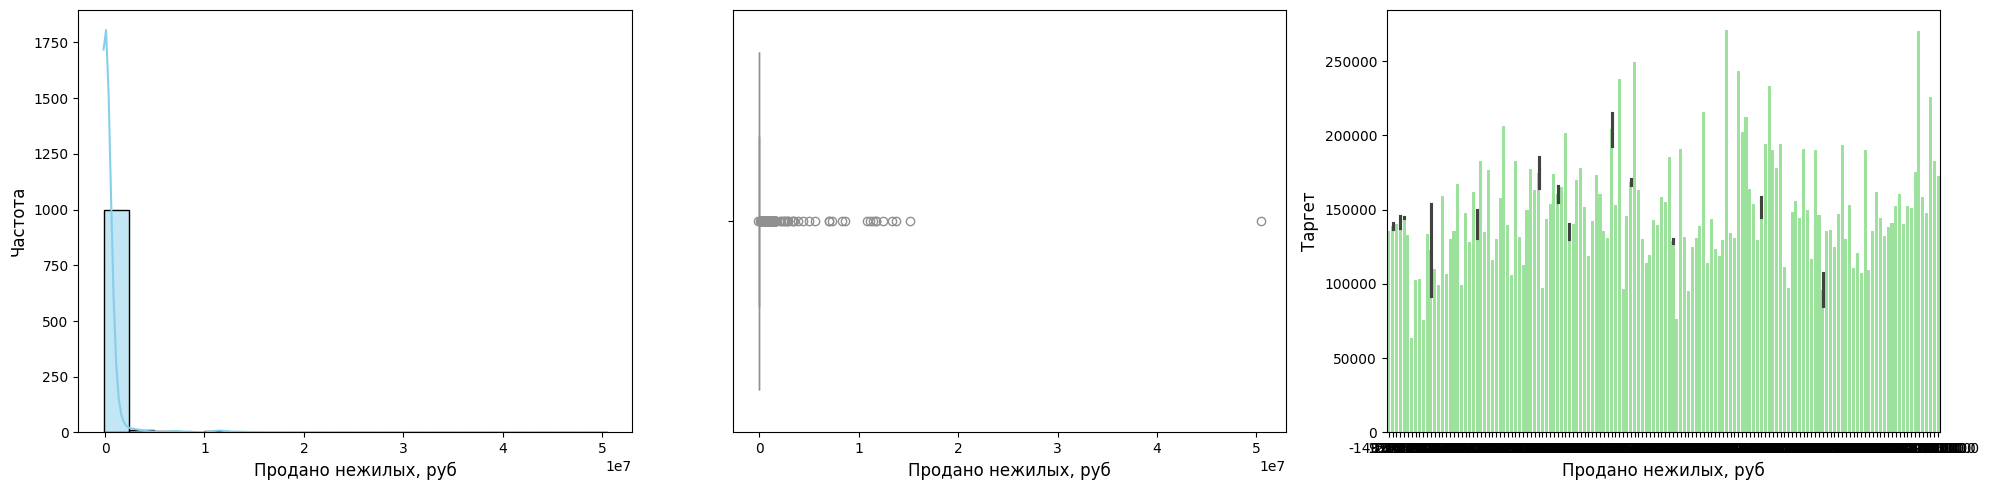

In [24]:
columns = [
    'Общая площадь земельного участка',
    'Общая площадь квартир',
    'Продано нежилых, м2',
    'Продано машиномест, руб',
    'Продано машиномест, шт',
    'Продано машиномест, м2',
    'Продано квартир, шт',
    'Продано нежилых, шт',
    'Продано нежилых, руб'
]

visualize_distribution(ds, columns, 'Таргет')

Для данных с нормальным распределением и длиным правым хвостом следует применить логарифмирование, для других столбцов исправить выбросы и заполнить пропуски средним или медианой. 

In [26]:
columns_to_fill = [
    'Продано нежилых, м2',
    'Продано машиномест, руб',
    'Продано машиномест, шт',
    'Продано машиномест, м2',
    'Продано квартир, шт',
    'Продано нежилых, шт',
    'Продано нежилых, руб']


for column in columns_to_fill:
    ds[column] = ds[column].apply(lambda x: np.nan if x < 0 else x)
    ds[column] = np.log1p(ds[column].fillna(0) + 1)

ds[columns_to_fill] = ds[columns_to_fill].interpolate(method='linear', order=2, axis=0)



In [25]:
square_columns = [    
    'Общая площадь земельного участка',
    'Общая площадь квартир']

for column in square_columns: 
    mean_value = ds[column].mean()
    ds[column] = ds[column].fillna(mean_value)
    print(ds[column].describe().apply(lambda x: f"{x: .3f}"))


count      1026.000
mean      10163.989
std        7108.037
min        1800.000
25%        5940.000
50%        8478.000
75%       11600.000
max       35198.000
Name: Общая площадь земельного участка, dtype: object
count      1026.000
mean      11282.028
std        5358.960
min        1219.000
25%        8261.000
50%       11282.028
75%       12635.000
max       35741.000
Name: Общая площадь квартир, dtype: object


Проверка пропусков:

In [27]:
for col in ds.columns:
    count_nan = ds[col].isna().sum()
    if count_nan != 0:
        print("Имеются пропуски")

## Аномалии и выбросы

In [28]:
def calculate_outliers(df, columns):
    boundaries_dict = {}
    
    for column in columns:
        q15 = df[column].quantile(0.15)
        q85 = df[column].quantile(0.85)
        iqr = q85 - q15
        lower_bound = q15 - 1.5 * iqr
        upper_bound = q85 + 1.5 * iqr
        
        print(f"Столбец: {column}")
        print(f"Нижняя граница: {lower_bound}")
        print(f"Верхняя граница: {upper_bound}")

        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        print(f"Количество выбросов: {outliers.sum()}\n")

        boundaries_dict[column] = (lower_bound, upper_bound)
    
    return boundaries_dict

In [29]:
calculate_outliers(ds, columns)

Столбец: Общая площадь земельного участка
Нижняя граница: -16674.0
Верхняя граница: 39038.0
Количество выбросов: 0

Столбец: Общая площадь квартир
Нижняя граница: -4727.5
Верхняя граница: 24100.5
Количество выбросов: 45

Столбец: Продано нежилых, м2
Нижняя граница: -0.010372048553128788
Верхняя граница: 1.8656792290817354
Количество выбросов: 139

Столбец: Продано машиномест, руб
Нижняя граница: -17.792643007871746
Верхняя граница: 31.50279749461276
Количество выбросов: 0

Столбец: Продано машиномест, шт
Нижняя граница: 0.0849495183976986
Верхняя граница: 1.7068099508303565
Количество выбросов: 47

Столбец: Продано машиномест, м2
Нижняя граница: -2.3540013031802673
Верхняя граница: 5.771727986793634
Количество выбросов: 3

Столбец: Продано квартир, шт
Нижняя граница: -1.3155445799830405
Верхняя граница: 5.12220706975336
Количество выбросов: 0

Столбец: Продано нежилых, шт
Нижняя граница: 0.0849495183976986
Верхняя граница: 1.7068099508303565
Количество выбросов: 25

Столбец: Продано не

{'Общая площадь земельного участка': (-16674.0, 39038.0),
 'Общая площадь квартир': (-4727.5, 24100.5),
 'Продано нежилых, м2': (-0.010372048553128788, 1.8656792290817354),
 'Продано машиномест, руб': (-17.792643007871746, 31.50279749461276),
 'Продано машиномест, шт': (0.0849495183976986, 1.7068099508303565),
 'Продано машиномест, м2': (-2.3540013031802673, 5.771727986793634),
 'Продано квартир, шт': (-1.3155445799830405, 5.12220706975336),
 'Продано нежилых, шт': (0.0849495183976986, 1.7068099508303565),
 'Продано нежилых, руб': (-16.170514804459895, 28.79925048892634)}

Так как это значения продаж, выбросы можно заменять на верхнюю границу, считаем, что продажи не могут быть отрицательные.
Обратить внимание на то, что в некоторых характеристиках процент выбросов ~9%. Это допустимо, но лучше выставлять квантили таким образом, чтобы процент выбросов не превышал 5%. 

In [30]:
def replace_outliers(df, columns):
    boundaries_dict = calculate_outliers(df, columns)
    
    for column in columns:
        lower_bound, upper_bound = boundaries_dict[column]
        
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
        df[column] = df[column].apply(lambda x: x if x < lower_bound else x)
        
#replace_outliers(ds, columns)


In [32]:
replace_outliers(ds, columns)

Столбец: Общая площадь земельного участка
Нижняя граница: -16674.0
Верхняя граница: 39038.0
Количество выбросов: 0

Столбец: Общая площадь квартир
Нижняя граница: -4727.5
Верхняя граница: 24100.5
Количество выбросов: 0

Столбец: Продано нежилых, м2
Нижняя граница: -0.010372048553128788
Верхняя граница: 1.8656792290817354
Количество выбросов: 0

Столбец: Продано машиномест, руб
Нижняя граница: -17.792643007871746
Верхняя граница: 31.50279749461276
Количество выбросов: 0

Столбец: Продано машиномест, шт
Нижняя граница: 0.0849495183976986
Верхняя граница: 1.7068099508303565
Количество выбросов: 0

Столбец: Продано машиномест, м2
Нижняя граница: -2.3540013031802673
Верхняя граница: 5.771727986793634
Количество выбросов: 0

Столбец: Продано квартир, шт
Нижняя граница: -1.3155445799830405
Верхняя граница: 5.12220706975336
Количество выбросов: 0

Столбец: Продано нежилых, шт
Нижняя граница: 0.0849495183976986
Верхняя граница: 1.7068099508303565
Количество выбросов: 0

Столбец: Продано нежилых

## Data visualisation

### Промежуточный анализ
#### Все данные можно разбить на смысловые категории:   


Общая информация


Продажи


Общая информация о проектах


Инфраструктура


Удобства


Географическое положение


Инфраструктура в радиусе (наличие объектов на расстоянии)


Информация о транспортной доступности


Дополнительные характеристики и удобства

In [94]:
ds.dtypes

Регион                                          object
Населенный пункт                                object
Группа компаний                                 object
ID проекта                                       int64
Проект                                          object
Корпус                                           int64
Класс недвижимости                              object
Статус                                          object
Месяц                                           object
Продано квартир, шт                            float64
Продано нежилых, шт                            float64
Продано нежилых, м2                            float64
Продано нежилых, руб                           float64
Продано машиномест, шт                         float64
Продано машиномест, м2                         float64
Продано машиномест, руб                        float64
Таргет                                         float64
ЖК                                              object
Количество

In [33]:
infra = [
    'Инфраструктура: Продукты',
    'Инфраструктура: Медицина',
    'Инфраструктура: Спорт',
    'Инфраструктура: Новостройки',
    'Инфраструктура: Школы',
    'Инфраструктура: Детские сады',
    'Инфраструктура: Торговые центры',
    'Инфраструктура: Супермаркеты'
]

amenities = [
    'Высота потолков',
    'Площадь коммерческих помещений',
    'Всего парковочных мест',
    'Гостевых мест',
    'Площадь детских площадок',
    'Площадь особых площадок',
    'Площадь спортивных площадок'
]

# float / int
geographical_positions = [
    'Широта',
    'Долгота',
    'Количество домов 250м',
    'Средняя этажность 250м',
    'Расстояние до ближайшего строения',
    'Высота над уровнем моря',
    'Самая низкая точка 250м',
    'Самая высокая точка 250м'
]

object_availability = [
    'Инфраструктура: Рядом ВУЗ', 
    'Есть железная дорога 250м',
    'Есть ЛЭП 100м',
    'Есть магистральные дороги 100м',
    'Есть АЗС 100м',
    'Есть скверы 500м',
    'Есть лес 500м',
    'Есть водоем 500м',
    'Есть пляж 1000м',
    'Есть кладбище 250м',
    'Есть тюрьма 250м',
    'Есть ПНД 250м',
    'Есть наркодиспансер 250м',
    'Есть промзона 250м',
    'Есть гаражи 500м'
]

# object
transfers = [
    'Уехать без пересадок: Луговая',
    'Уехать без пересадок: Центр',
    'Уехать без пересадок: Первая речка',
    'Уехать без пересадок: Вторая речка',
    'Уехать без пересадок: Третья рабочая',
    'Уехать без пересадок: Окатовая',
    'Уехать без пересадок: Баляева',
    'Уехать без пересадок: Кампус ДВФУ'
]

# int
distance = [
    'Расстояние по навигатору до: Луговая',
    'Расстояние по навигатору до: Центр',
    'Расстояние по навигатору до: Первая речка',
    'Расстояние по навигатору до: Вторая речка',
    'Расстояние по навигатору до: Третья рабочая',
    'Расстояние по навигатору до: Окатовая',
    'Расстояние по навигатору до: Баляева',
    'Расстояние по навигатору до: Кампус ДВФУ',
    'Расстояние по навигатору до: Артем',
    'Расстояние по навигатору до: В-надеждинское'
]

In [34]:
def visualize_(df, columns, target_column):
    for column in columns:
        
        plt.figure()  
        sns.barplot(x=column , y=target_column, data=df)
        plt.xticks(rotation=45)

        plt.subplot(1, 3, 2)
        sns.violinplot(x=column , y=target_column, data=df)
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()


### Инфраструктура

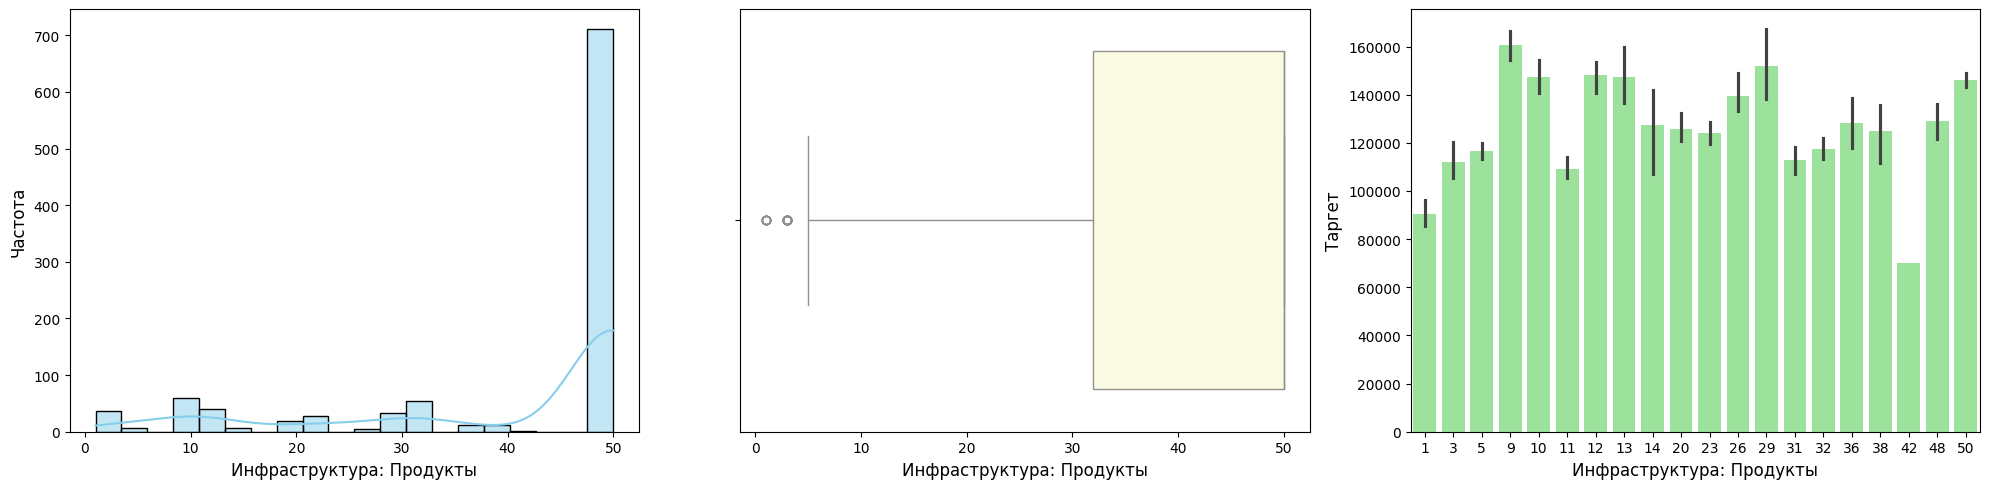

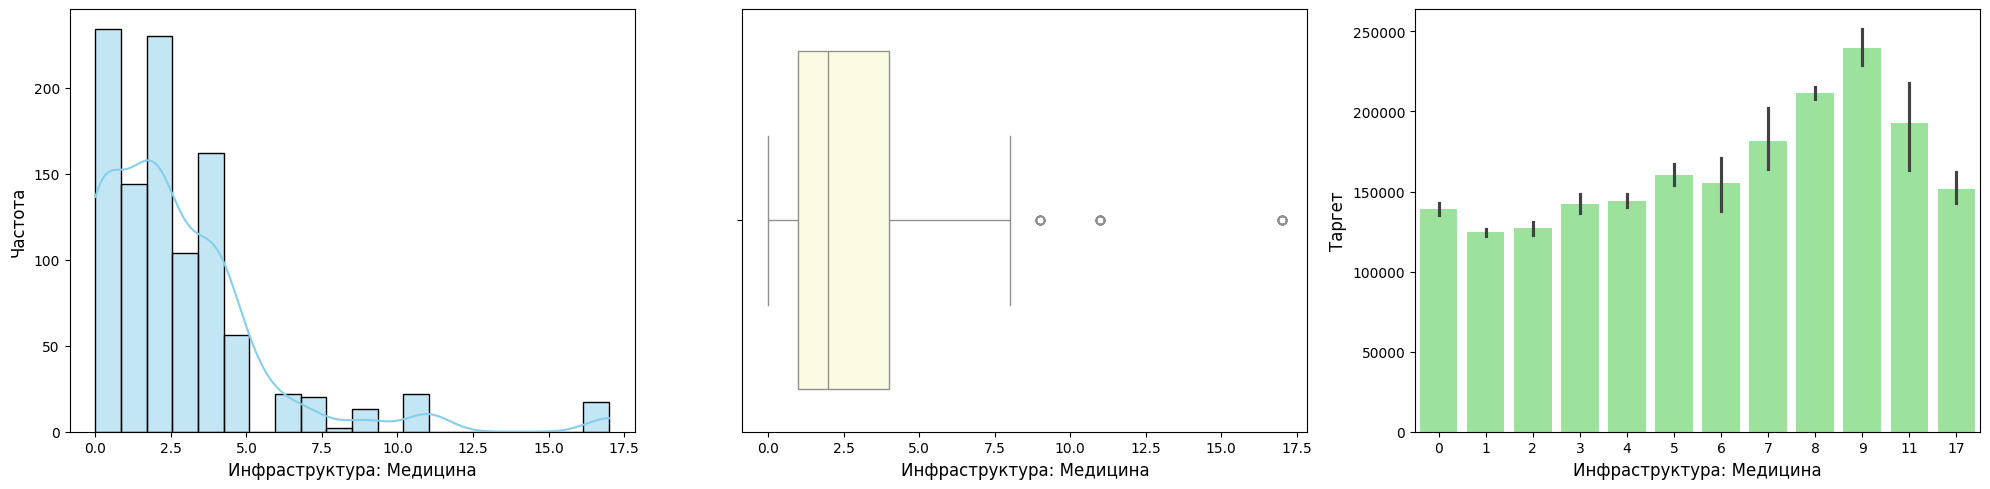

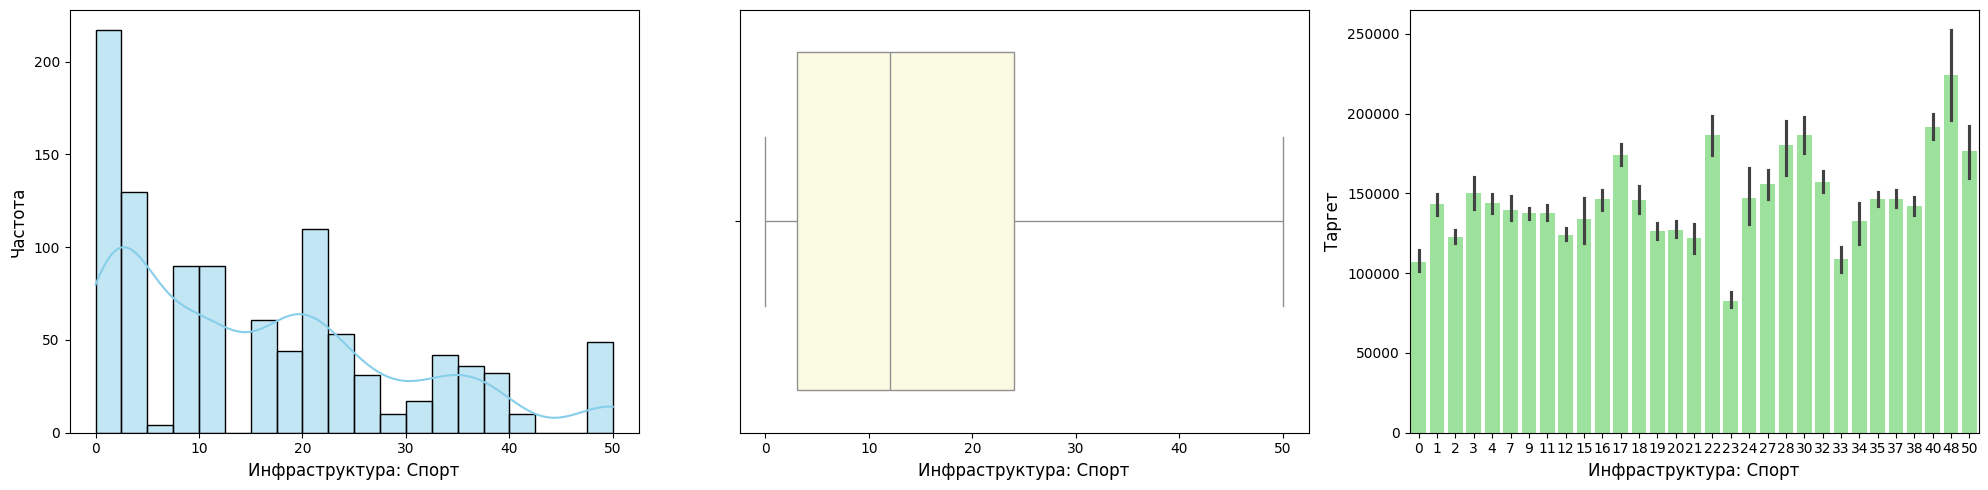

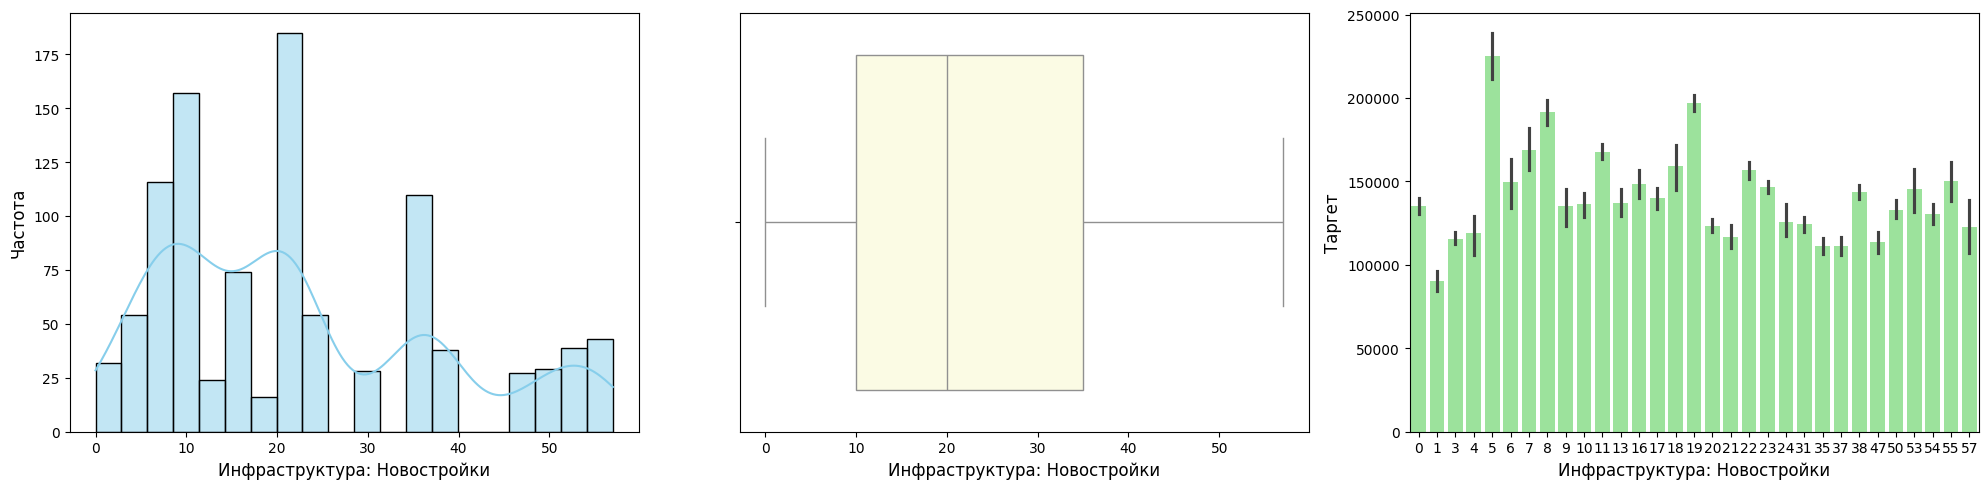

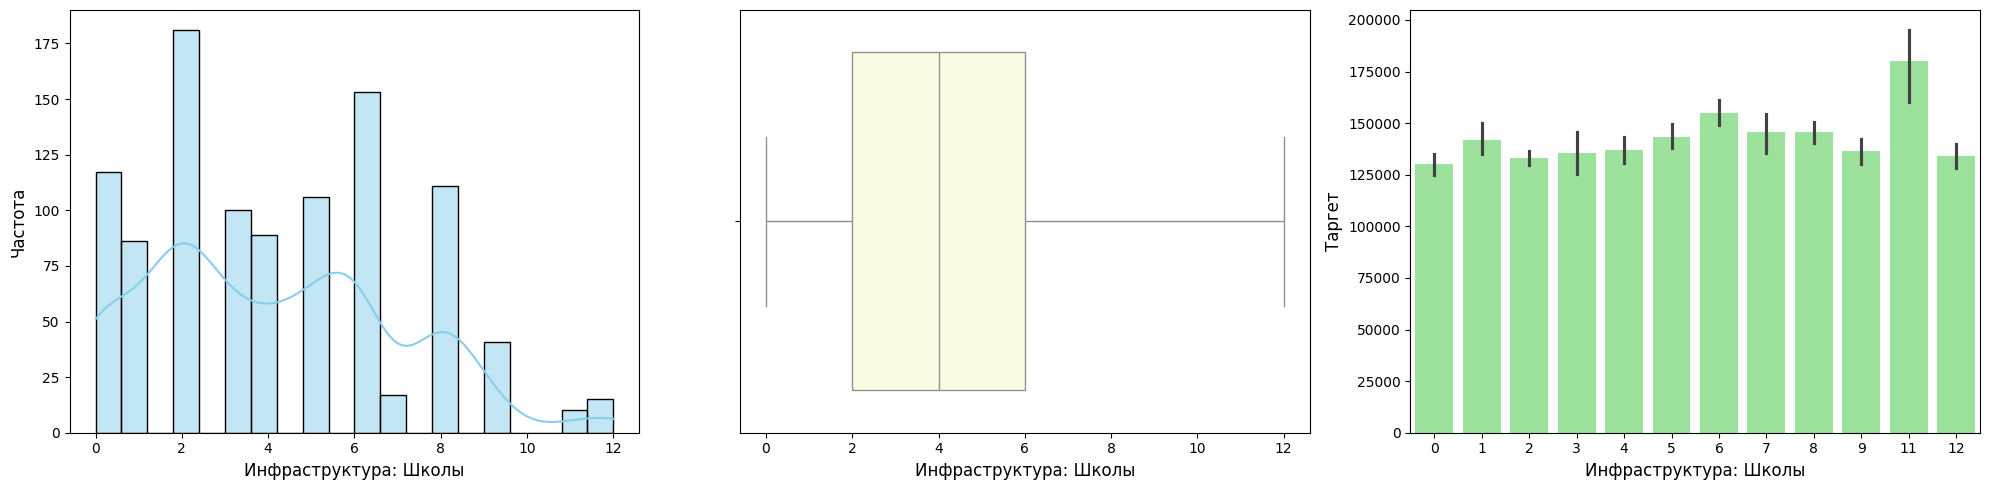

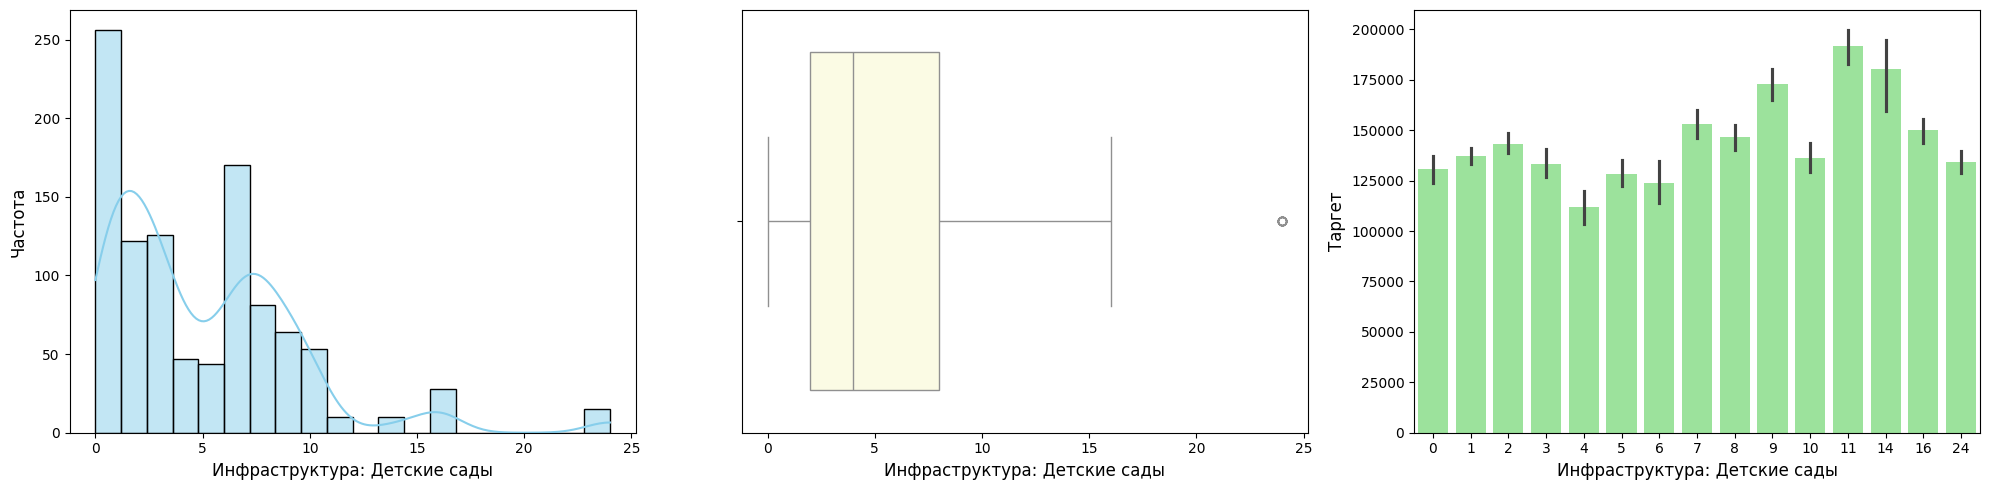

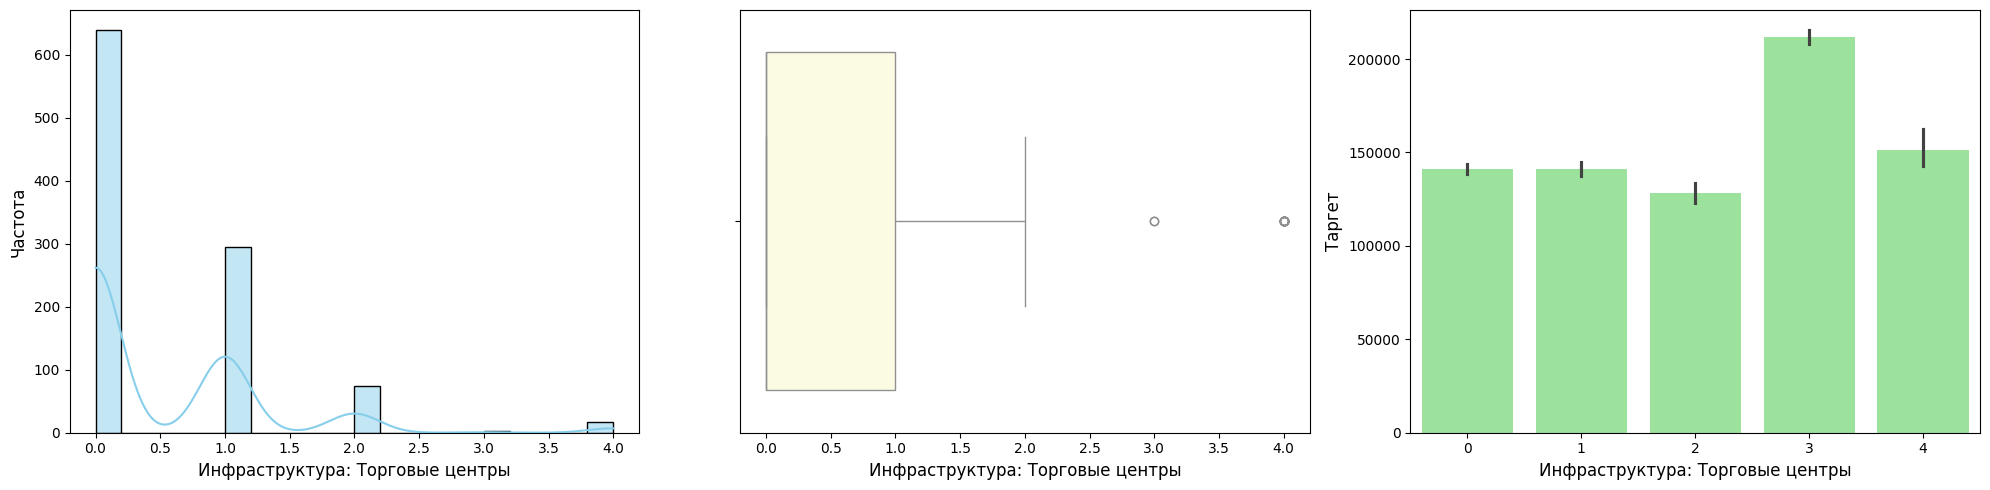

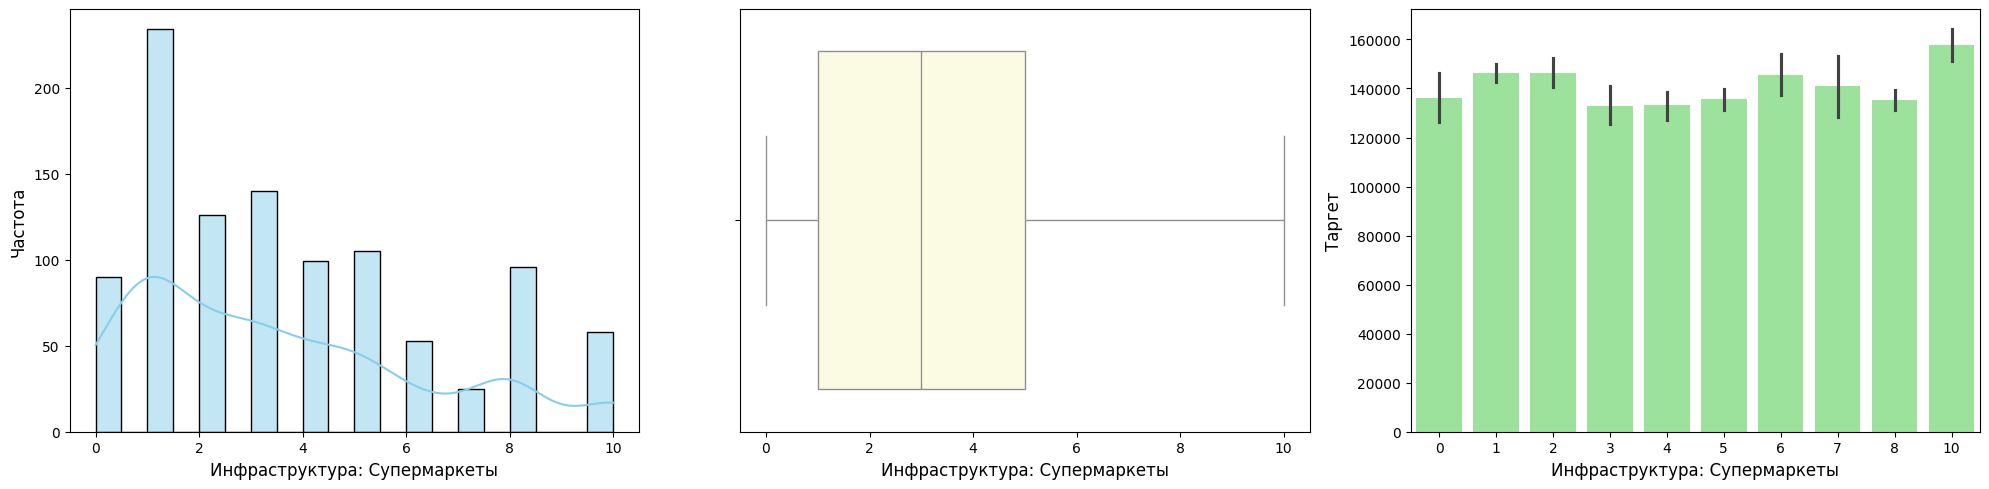

In [35]:
visualize_distribution(ds, infra, 'Таргет')

## Удобства

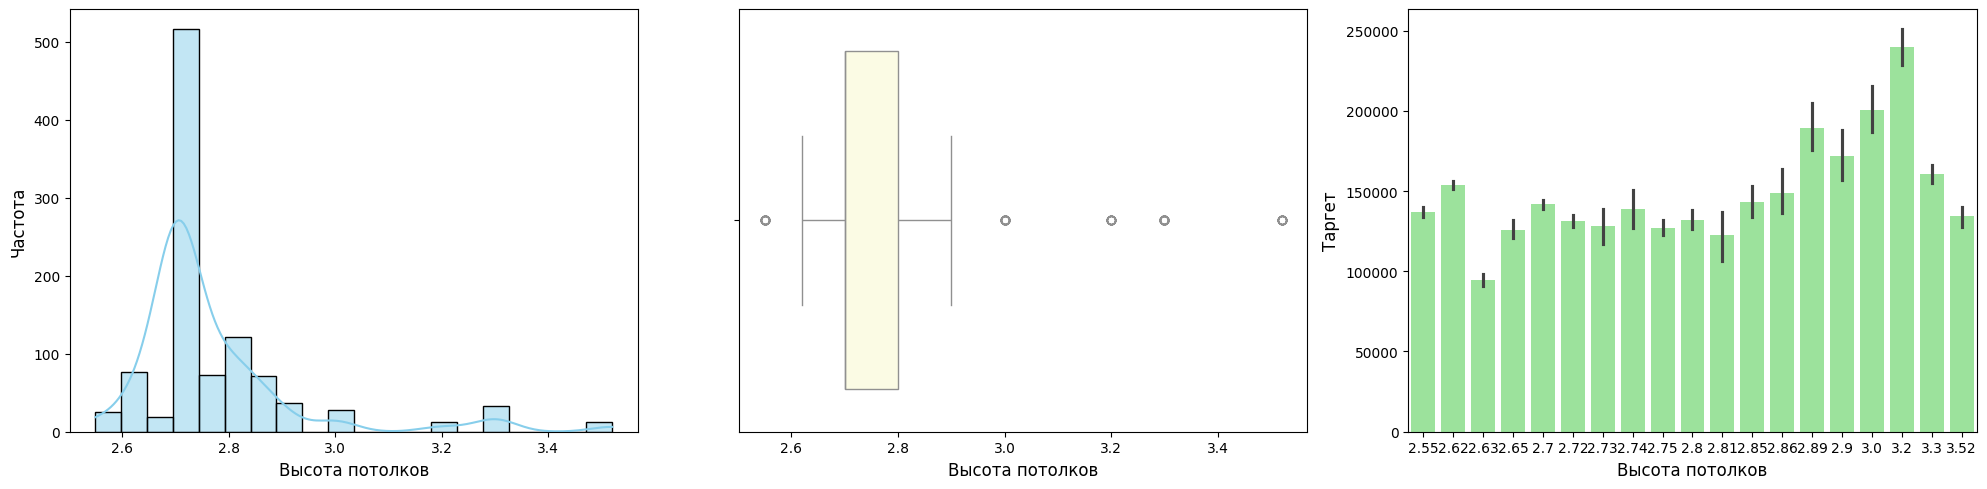

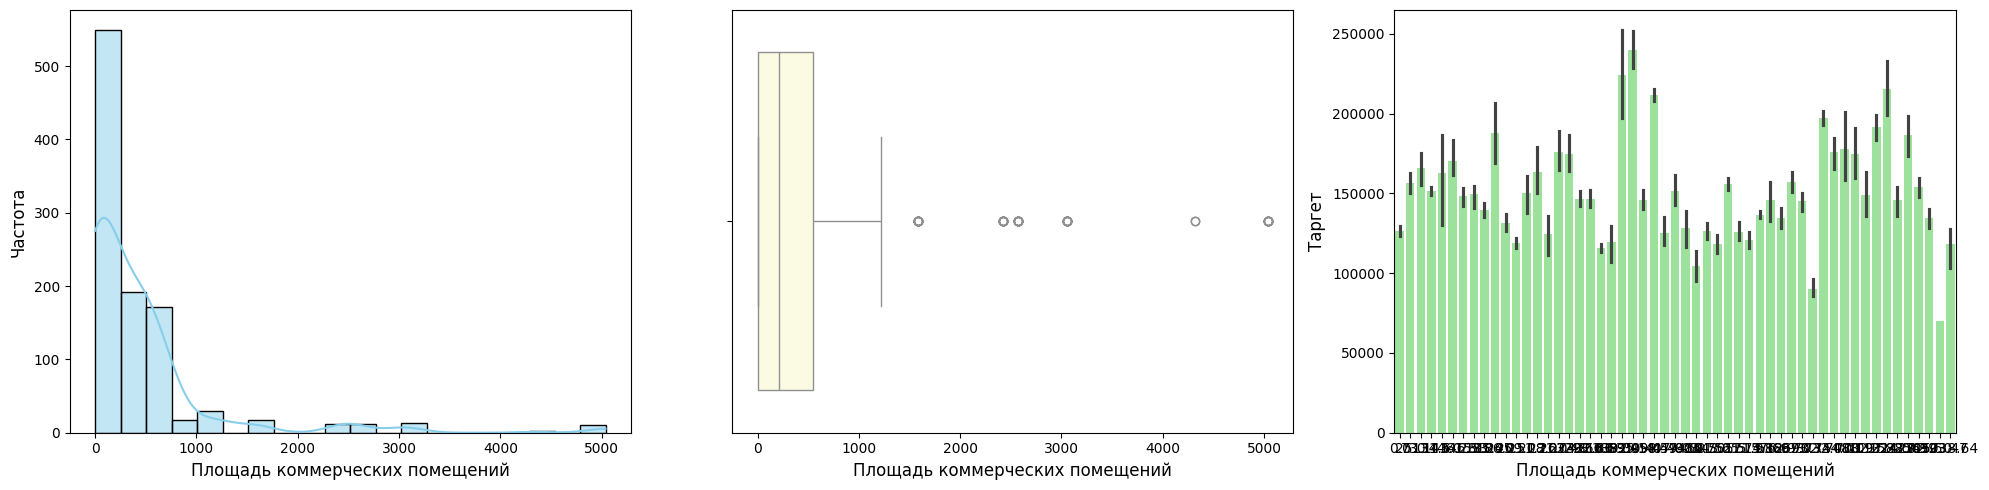

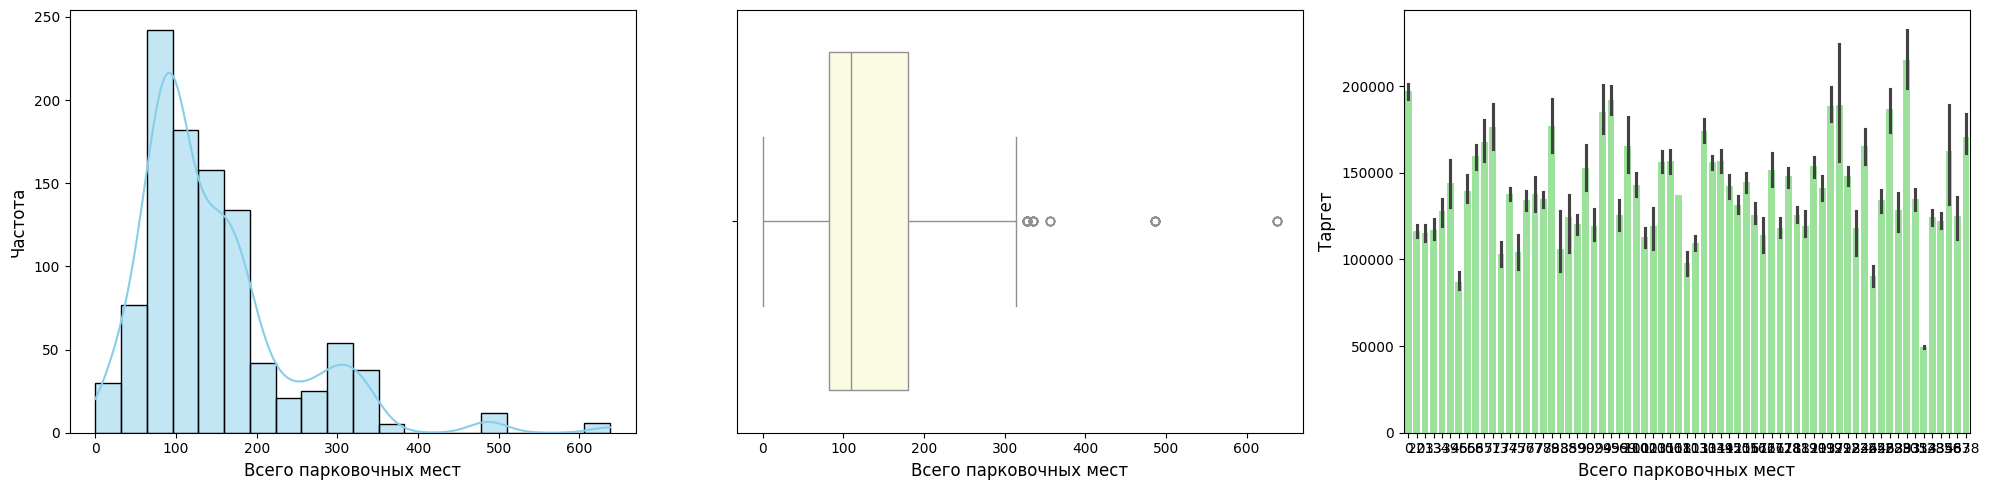

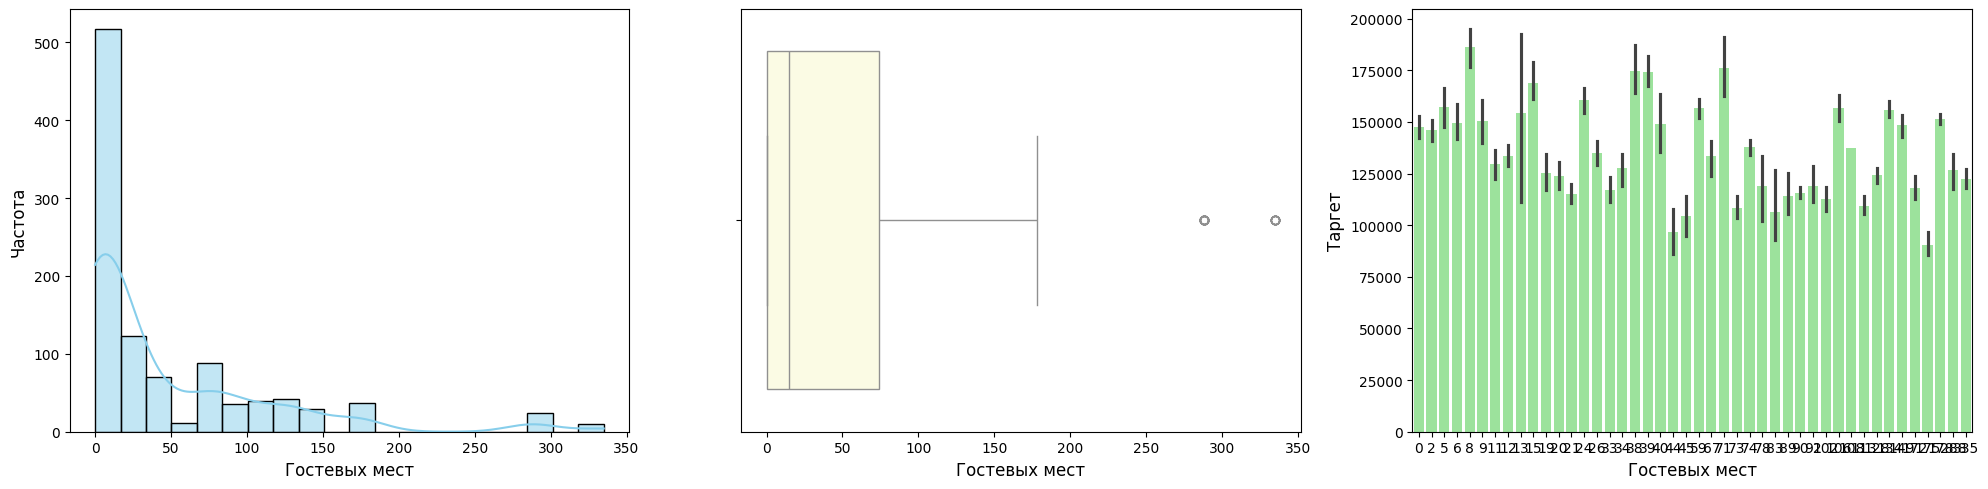

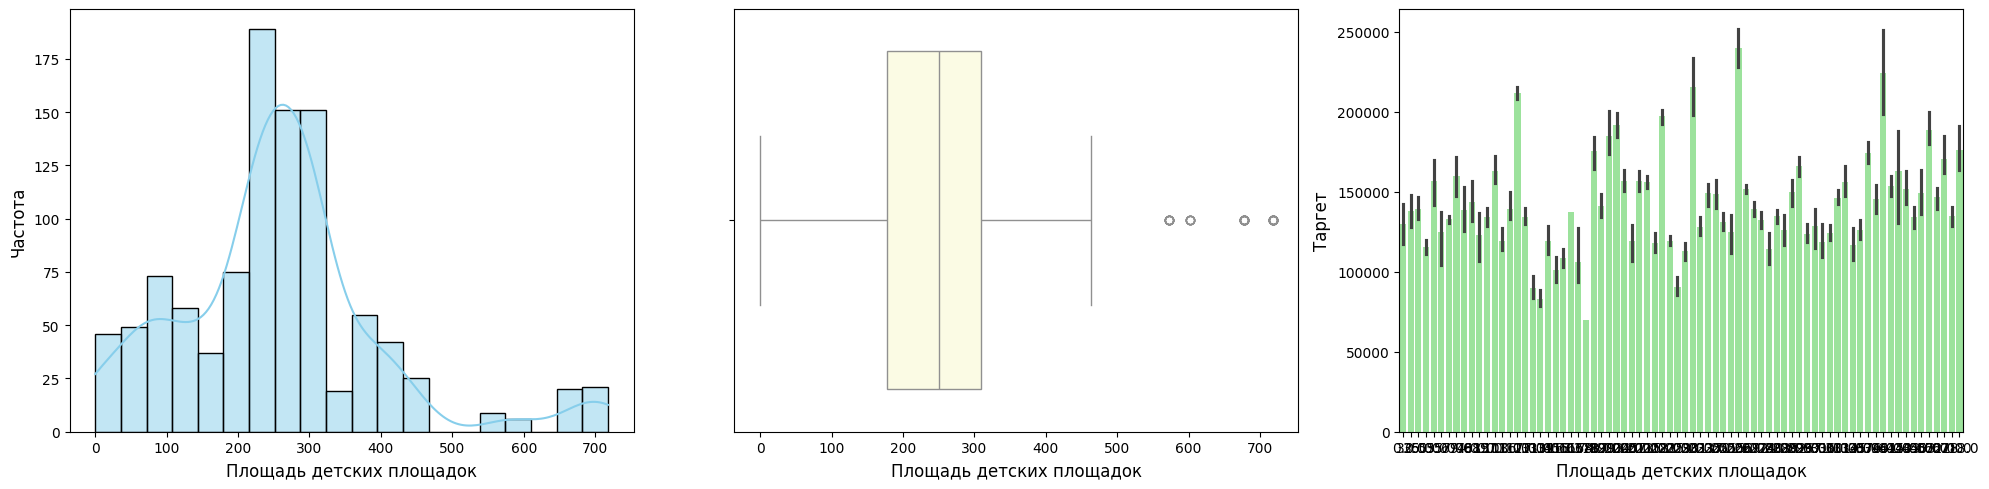

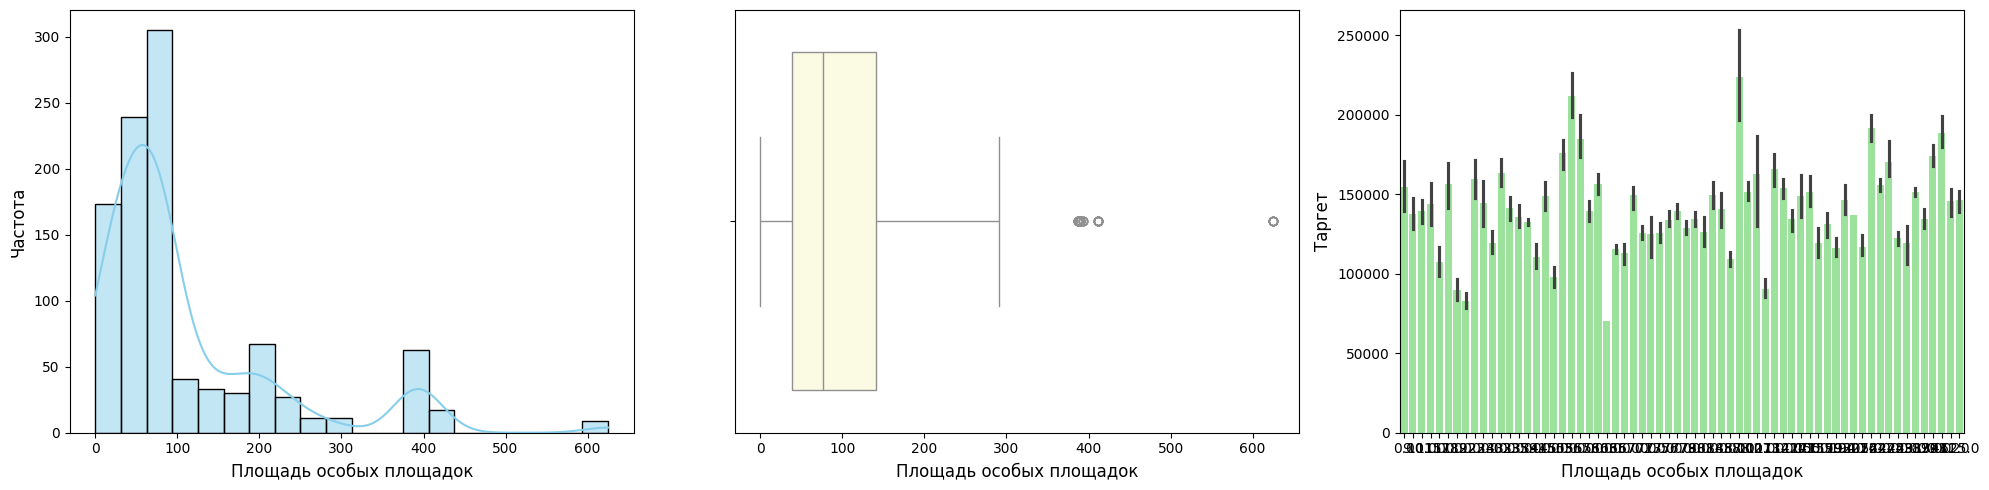

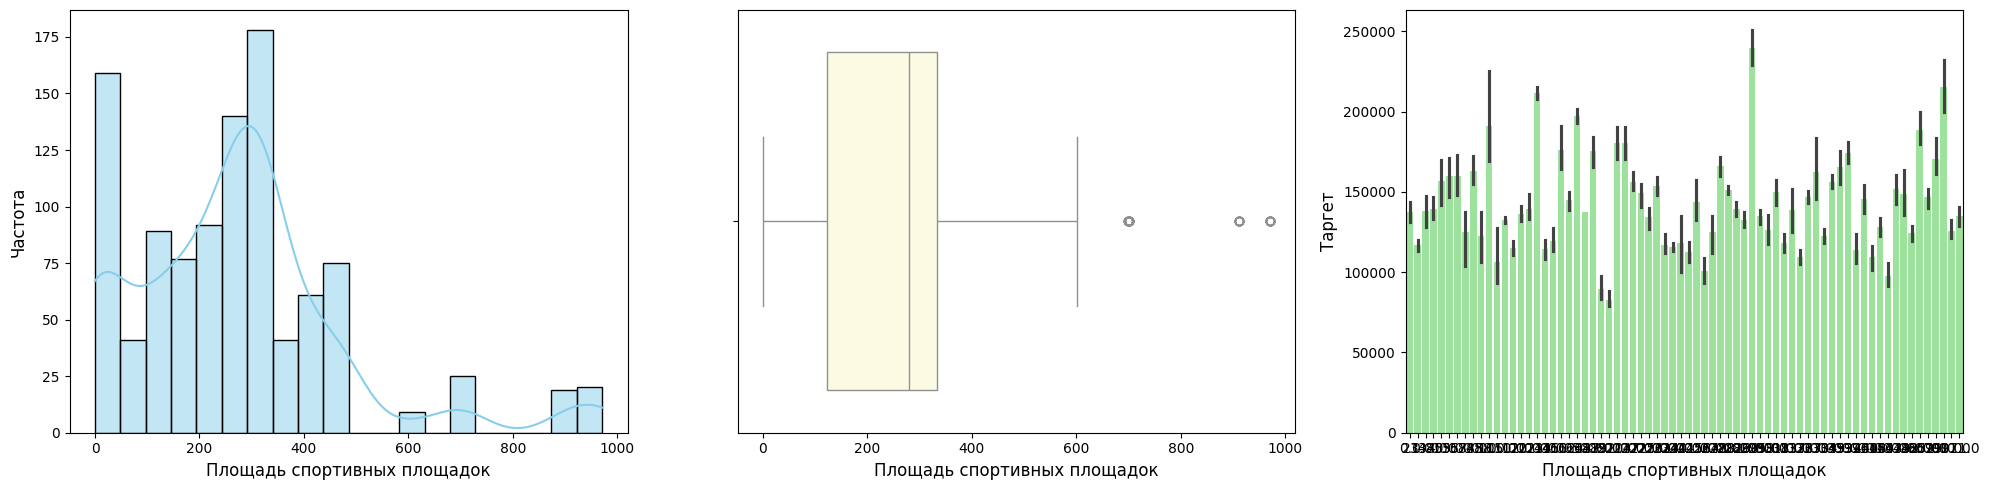

In [36]:
visualize_distribution(ds, amenities, 'Таргет')

## Географическое плолжение

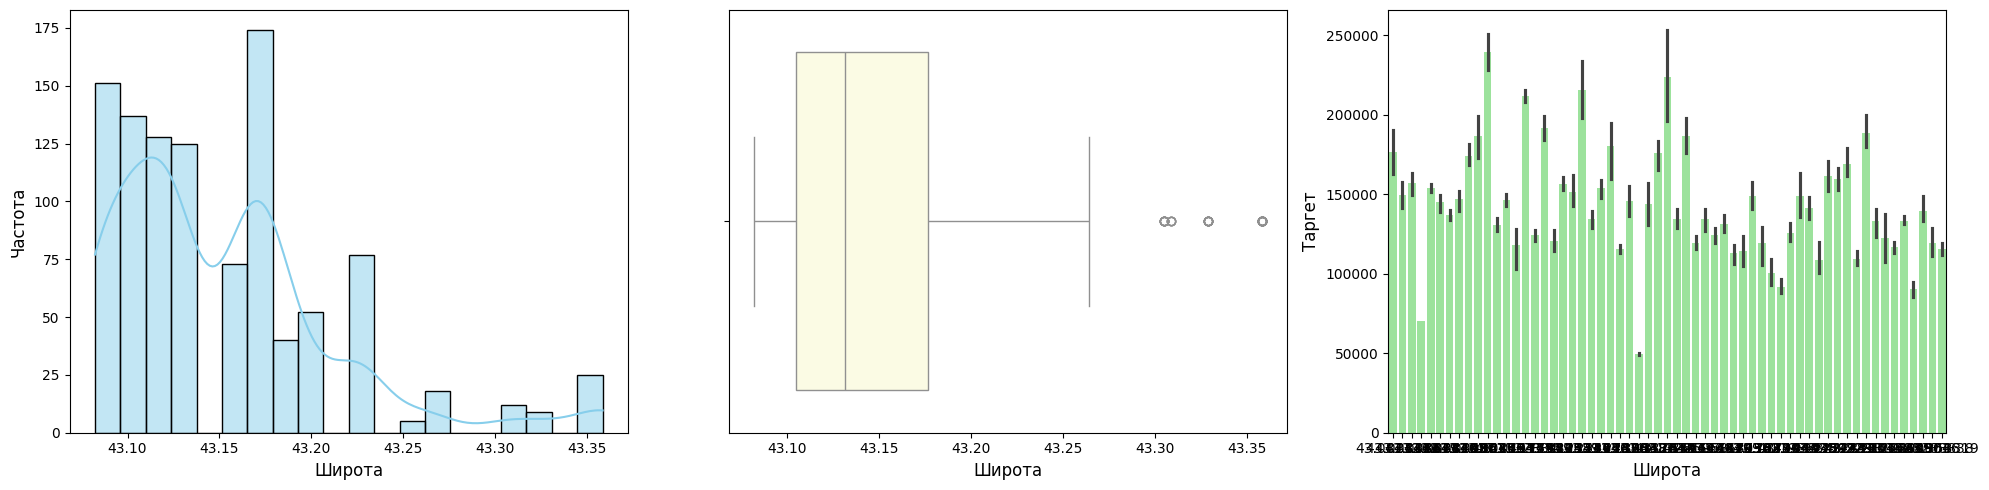

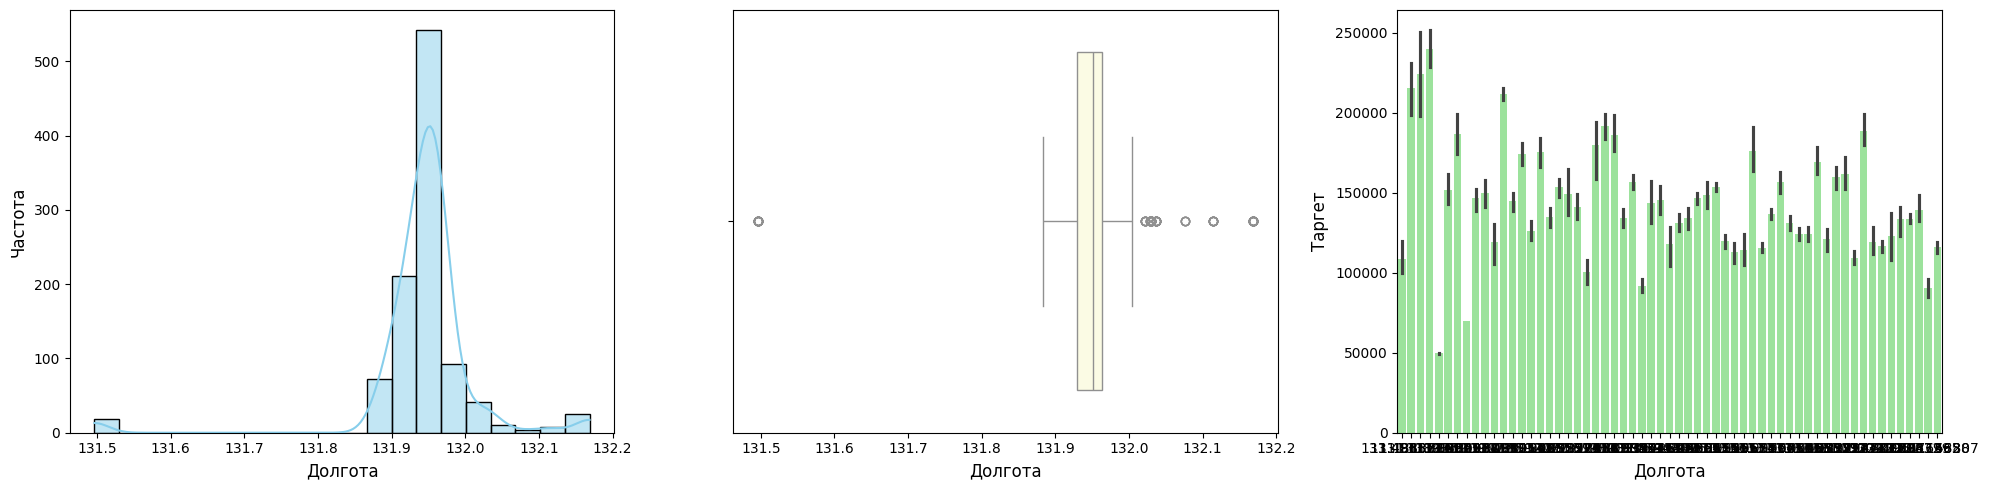

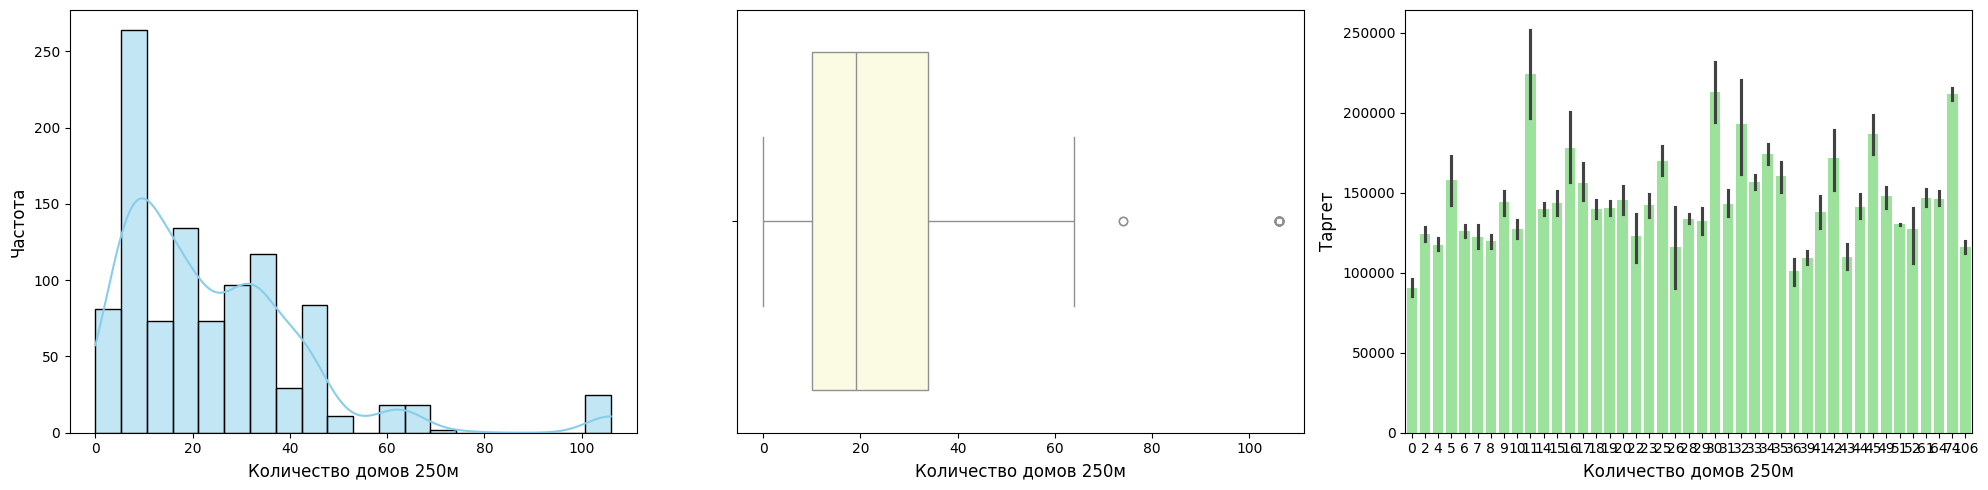

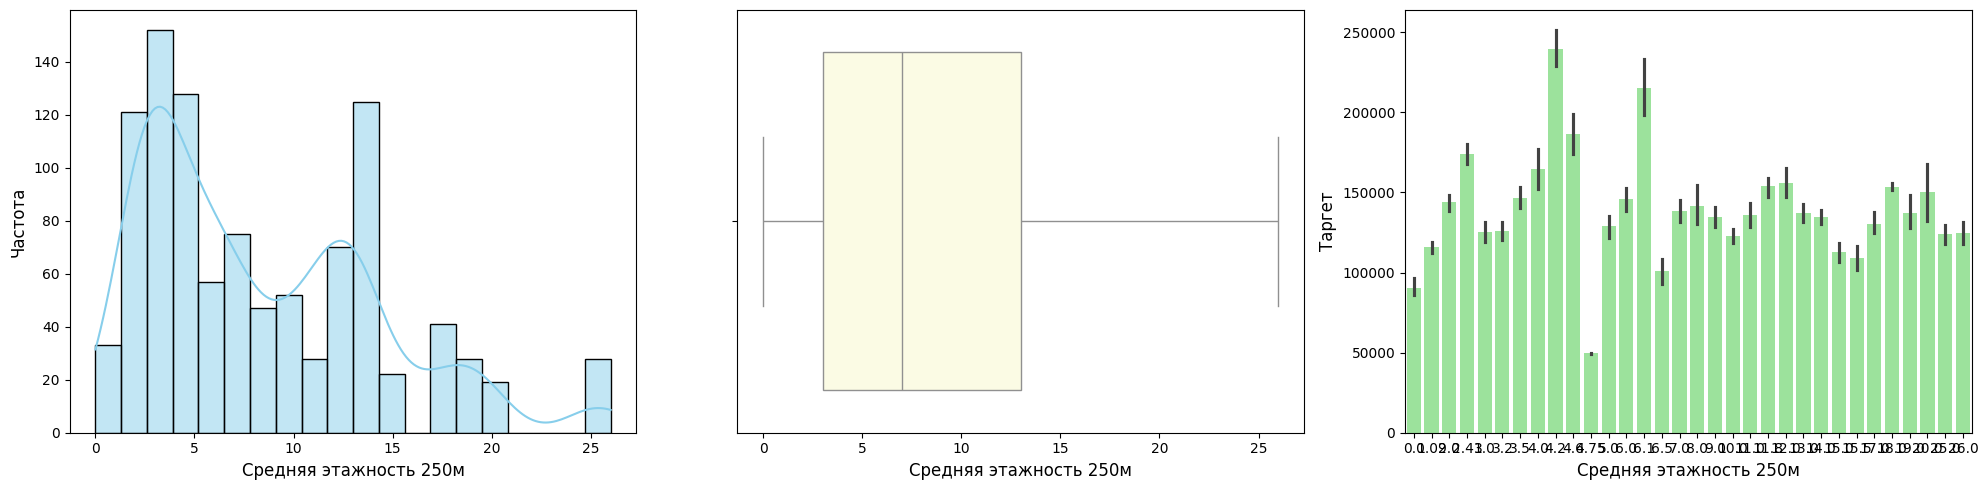

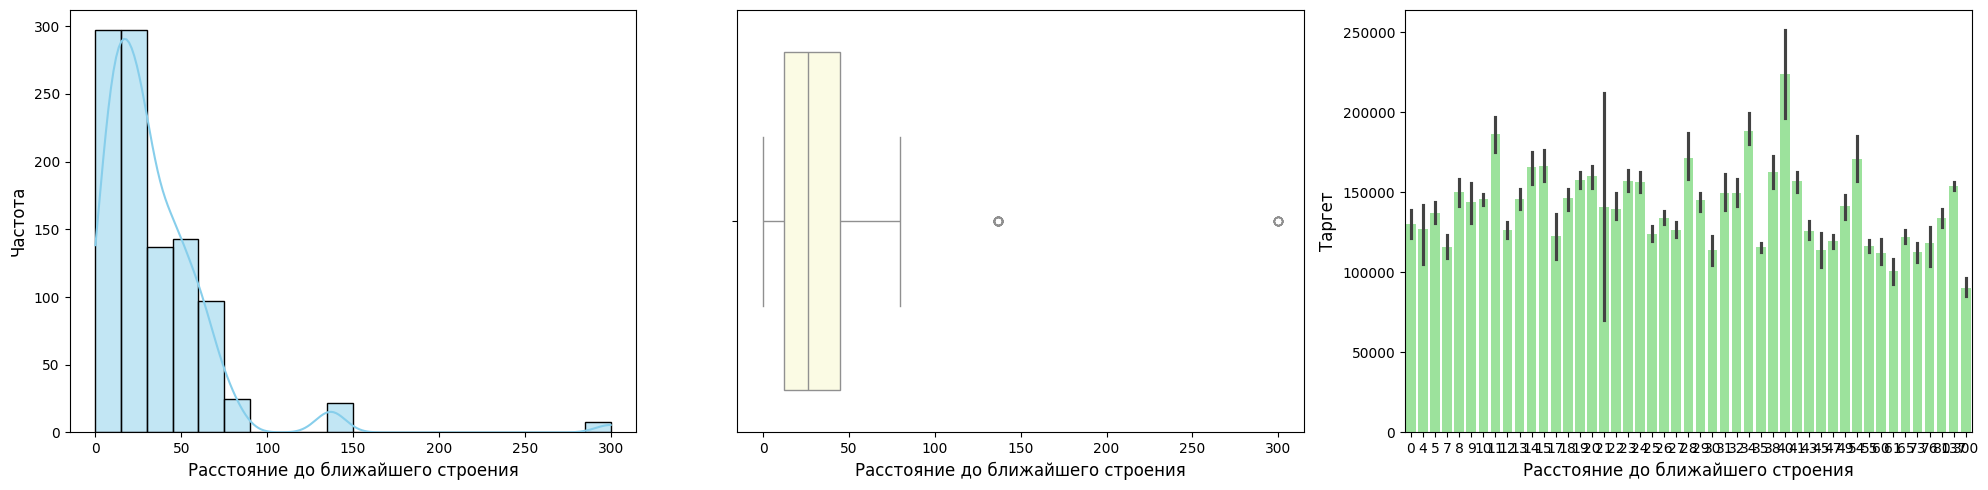

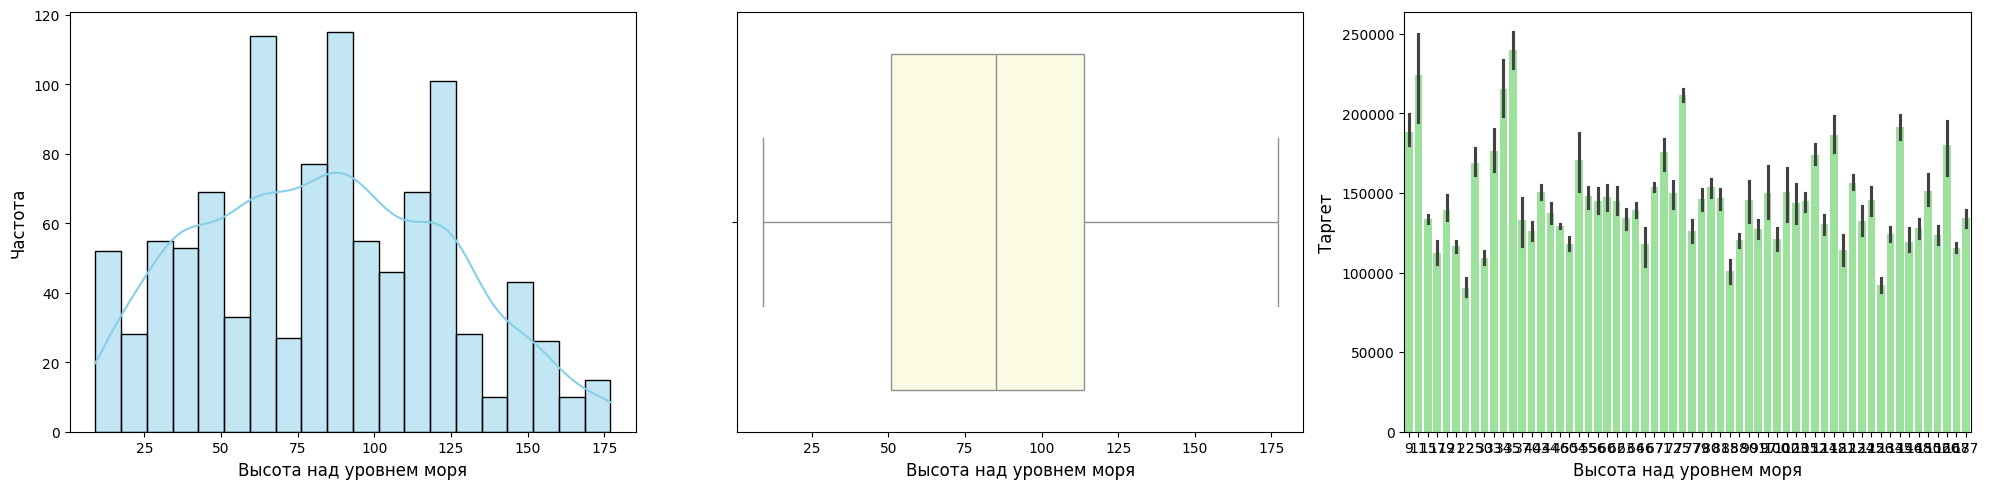

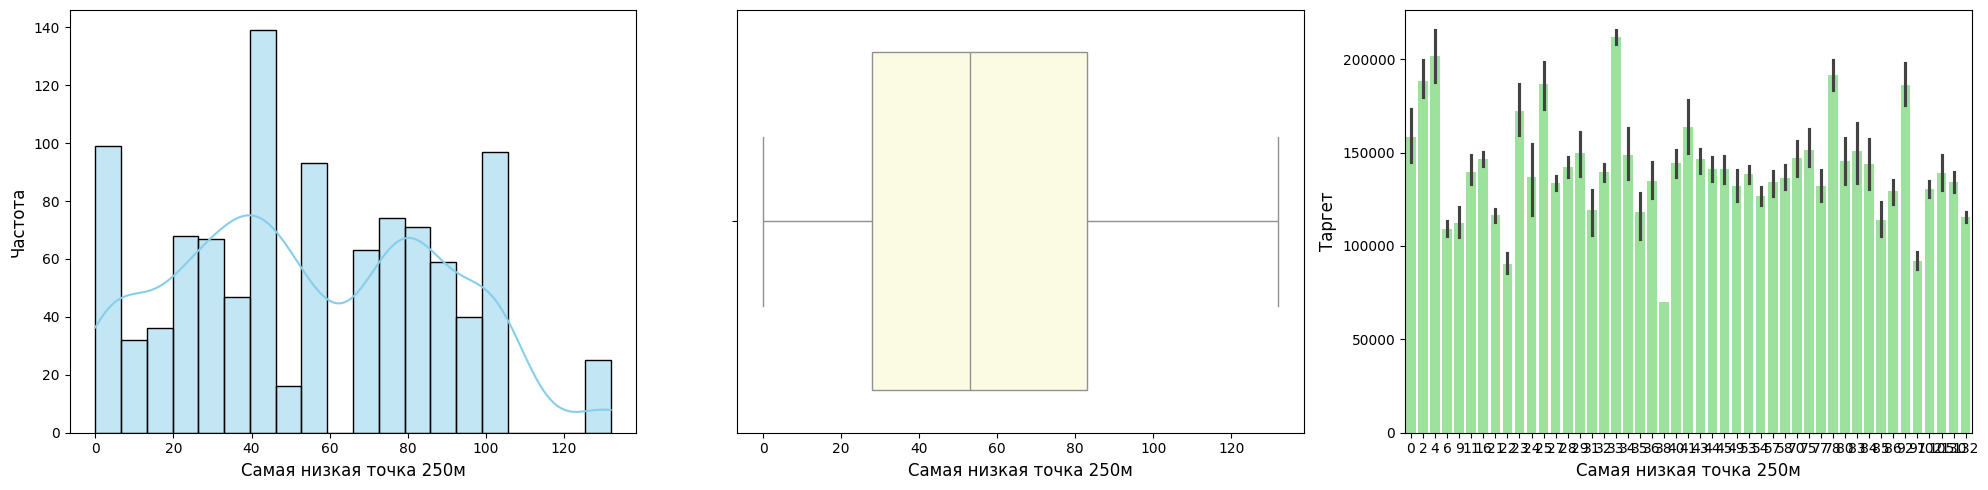

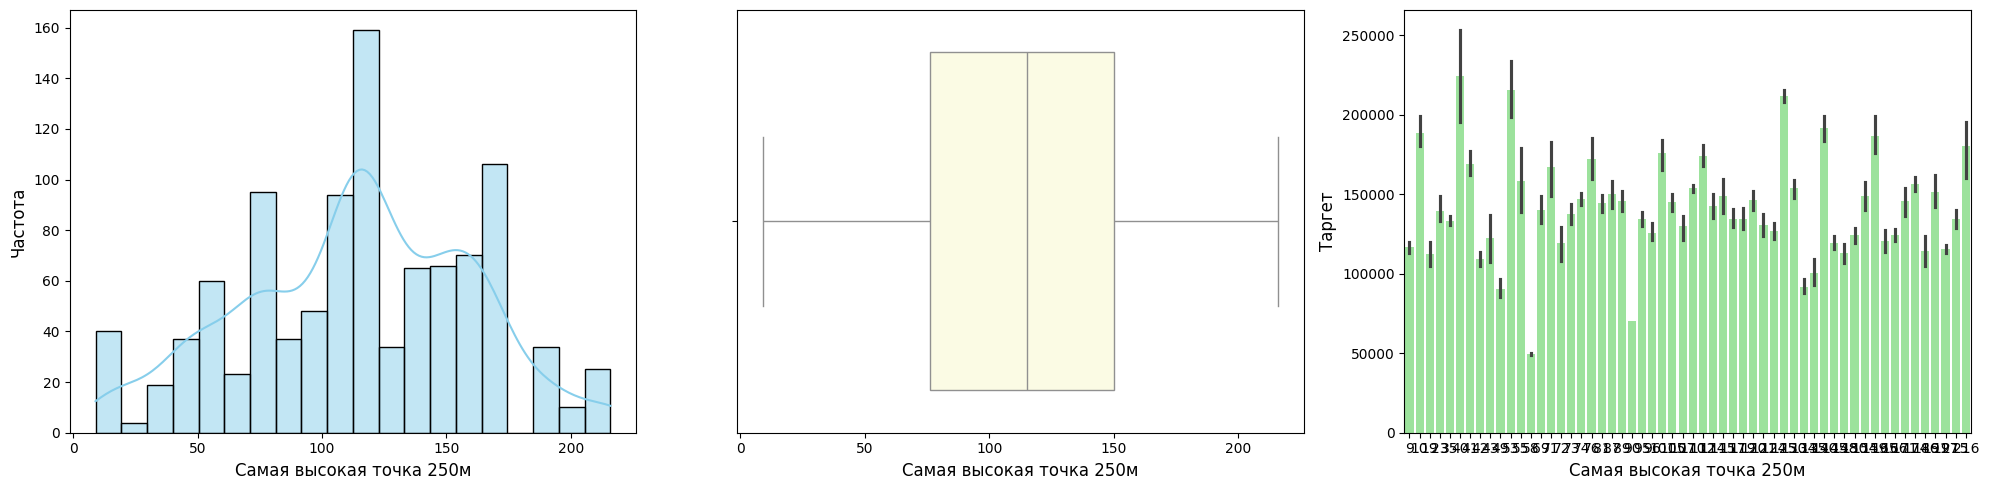

In [37]:
visualize_distribution(ds, geographical_positions, 'Таргет')

## Наличие объектов

In [38]:
def visualize_barplot(dataset, column, target_column):
    for col in column:

        plt.figure(figsize=(7, 4))
        sns.barplot(x=dataset[target_column], y=dataset[col], hue=dataset[col], dodge=False, palette='coolwarm')
        plt.xticks(rotation=45)
        plt.show()

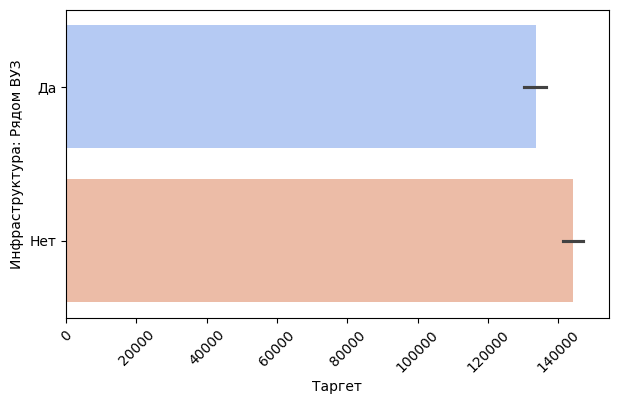

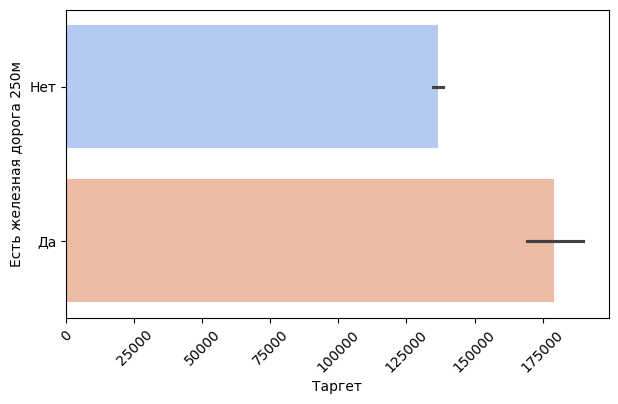

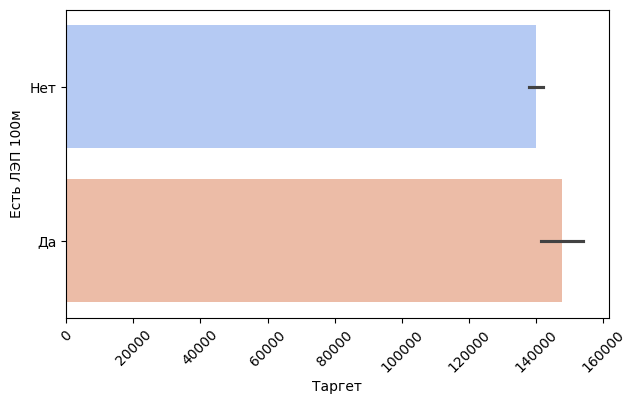

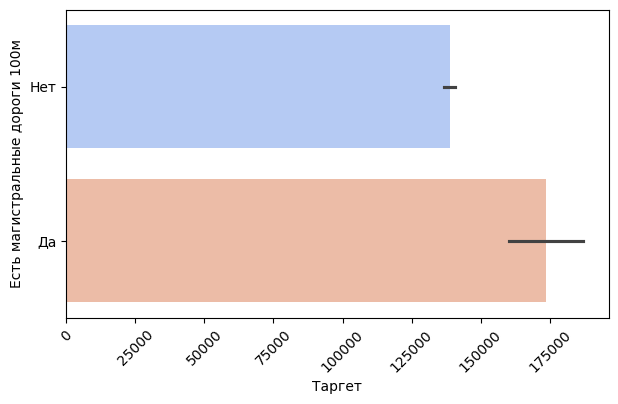

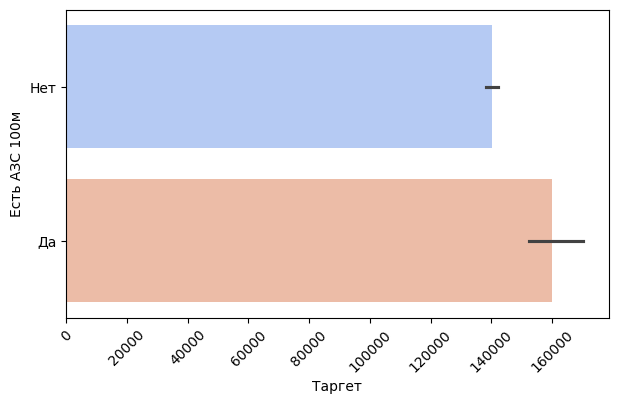

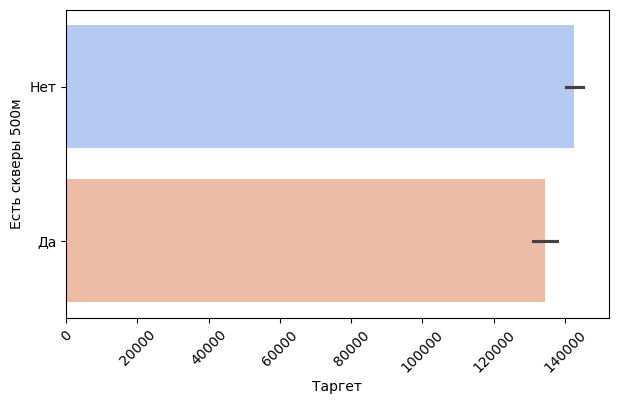

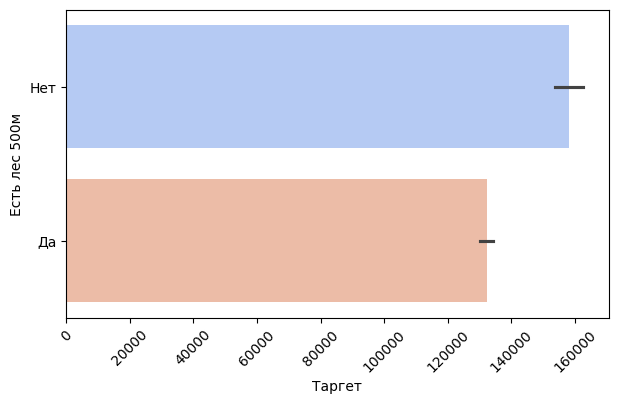

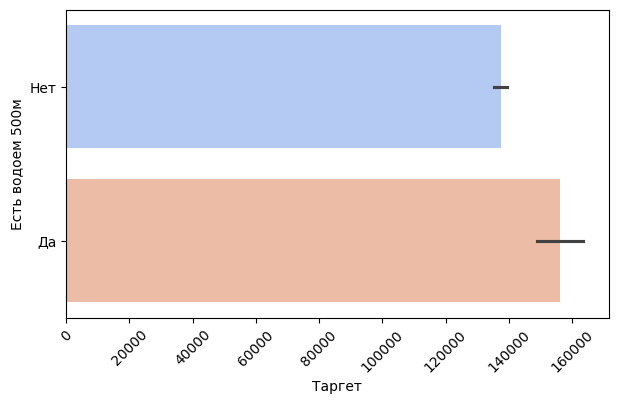

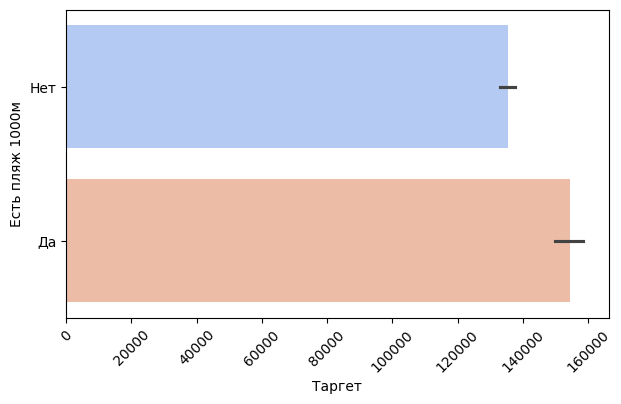

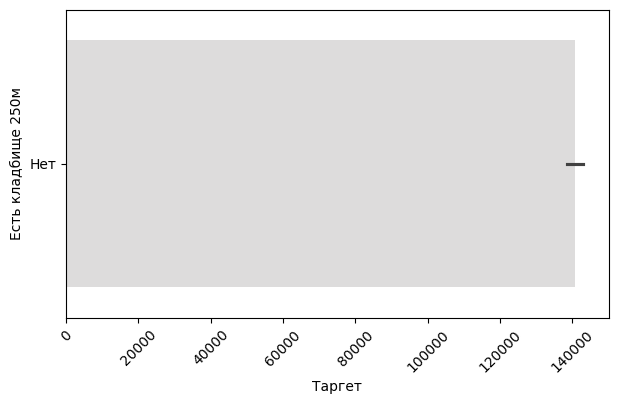

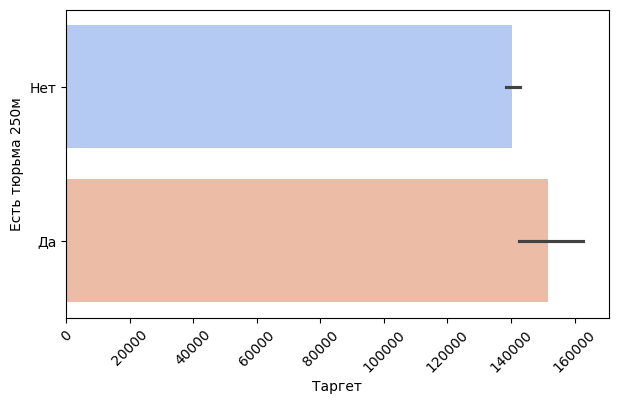

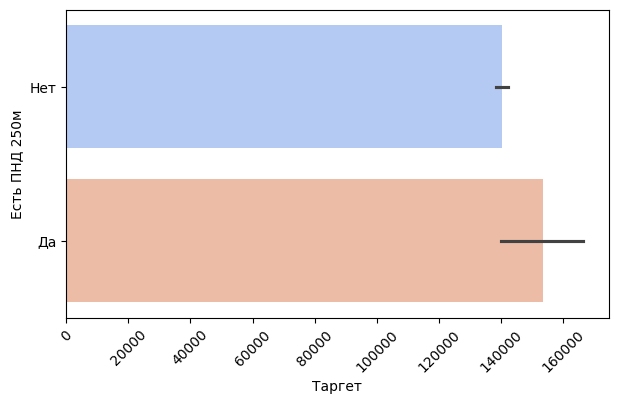

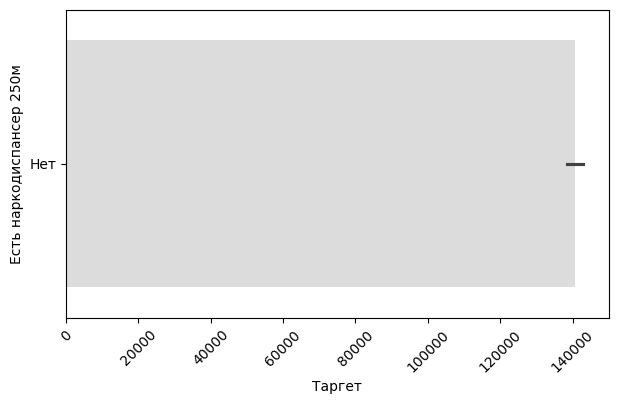

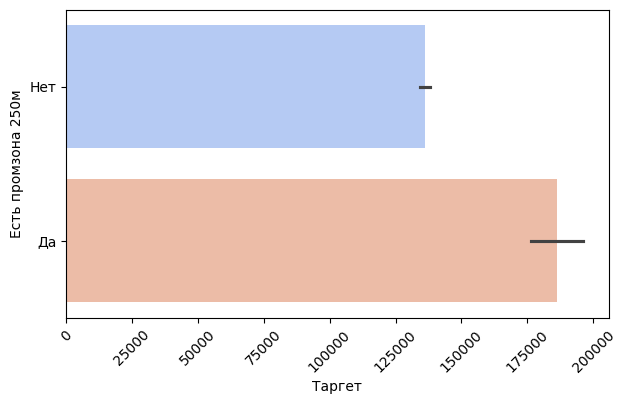

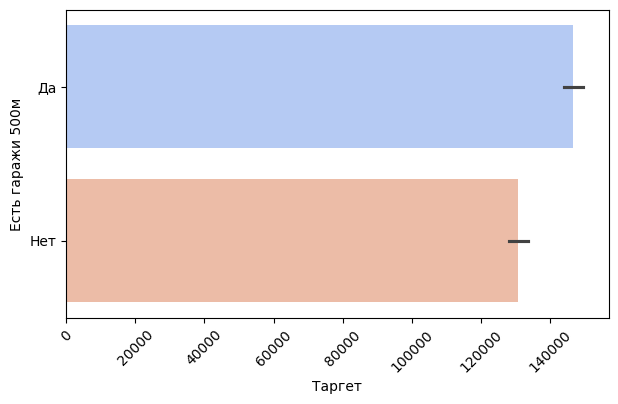

In [39]:
visualize_barplot(ds, object_availability, 'Таргет')

In [40]:
columns_to_drop = ['Есть кладбище 250м', 'Есть наркодиспансер 250м']
ds.drop(columns=columns_to_drop, inplace=True)

In [41]:
def visualize_distance_columns(dataset, distance_columns, target_column):
    for col in distance_columns:
        plt.figure(figsize=(20, 6))

        # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(data=dataset, x=col, y=target_column, bins=20, cbar=True, cmap='coolwarm')

        plt.subplot(1, 2, 2)
        sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)
        plt.xlabel(col, fontsize=12)
        plt.ylabel(target_column , fontsize=12)

        plt.tight_layout()
        plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


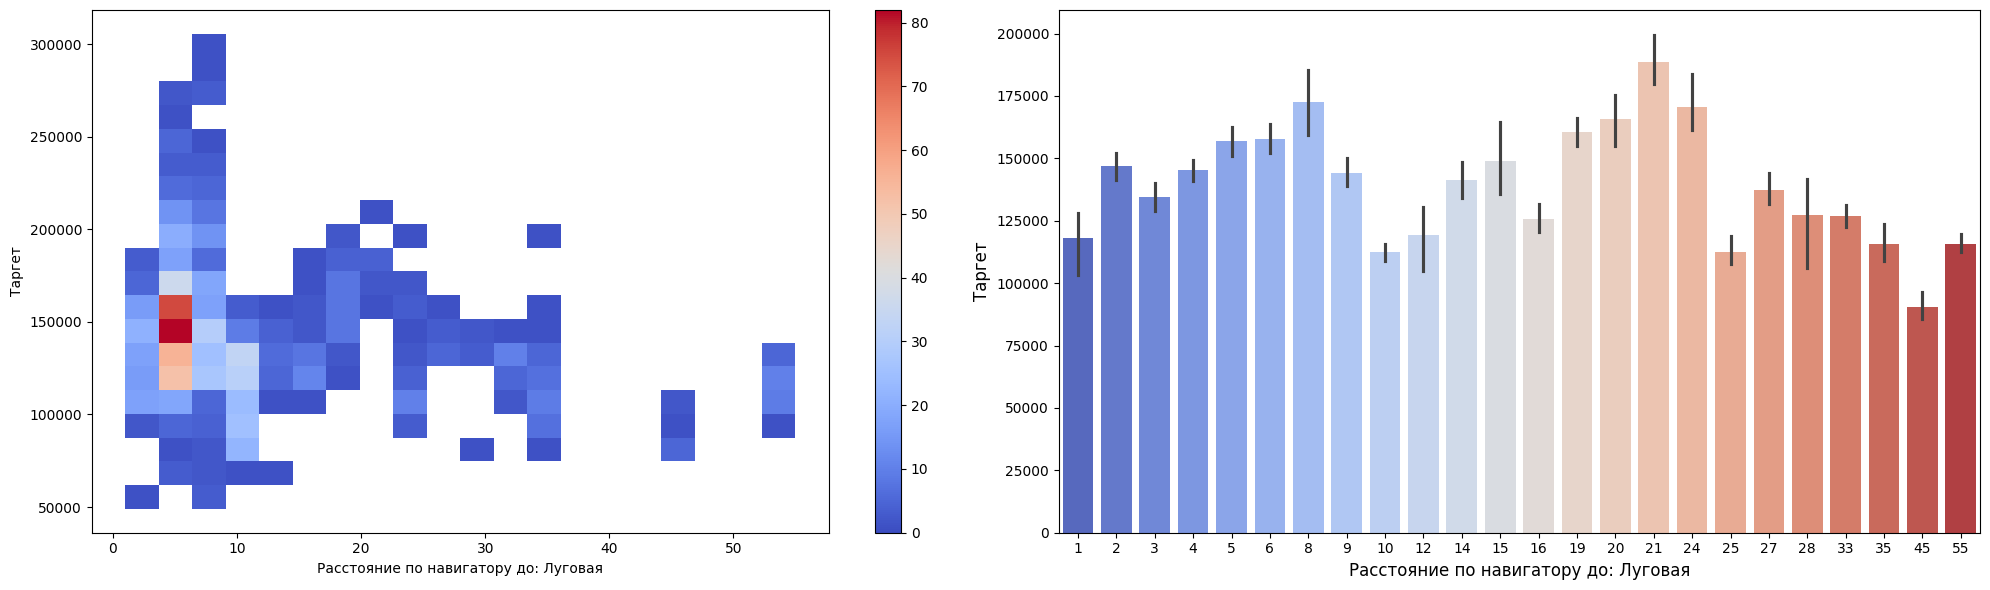

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


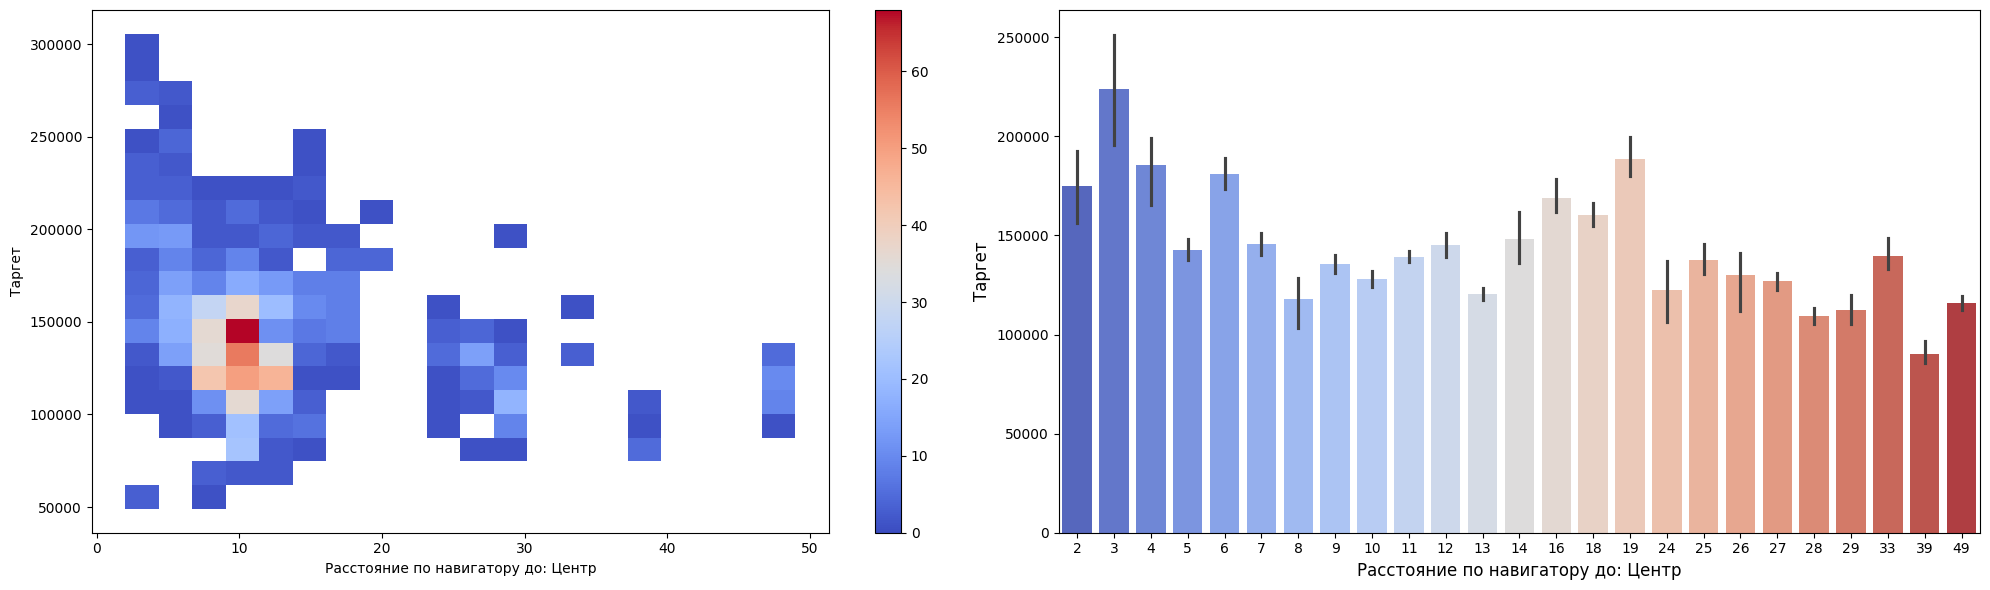

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


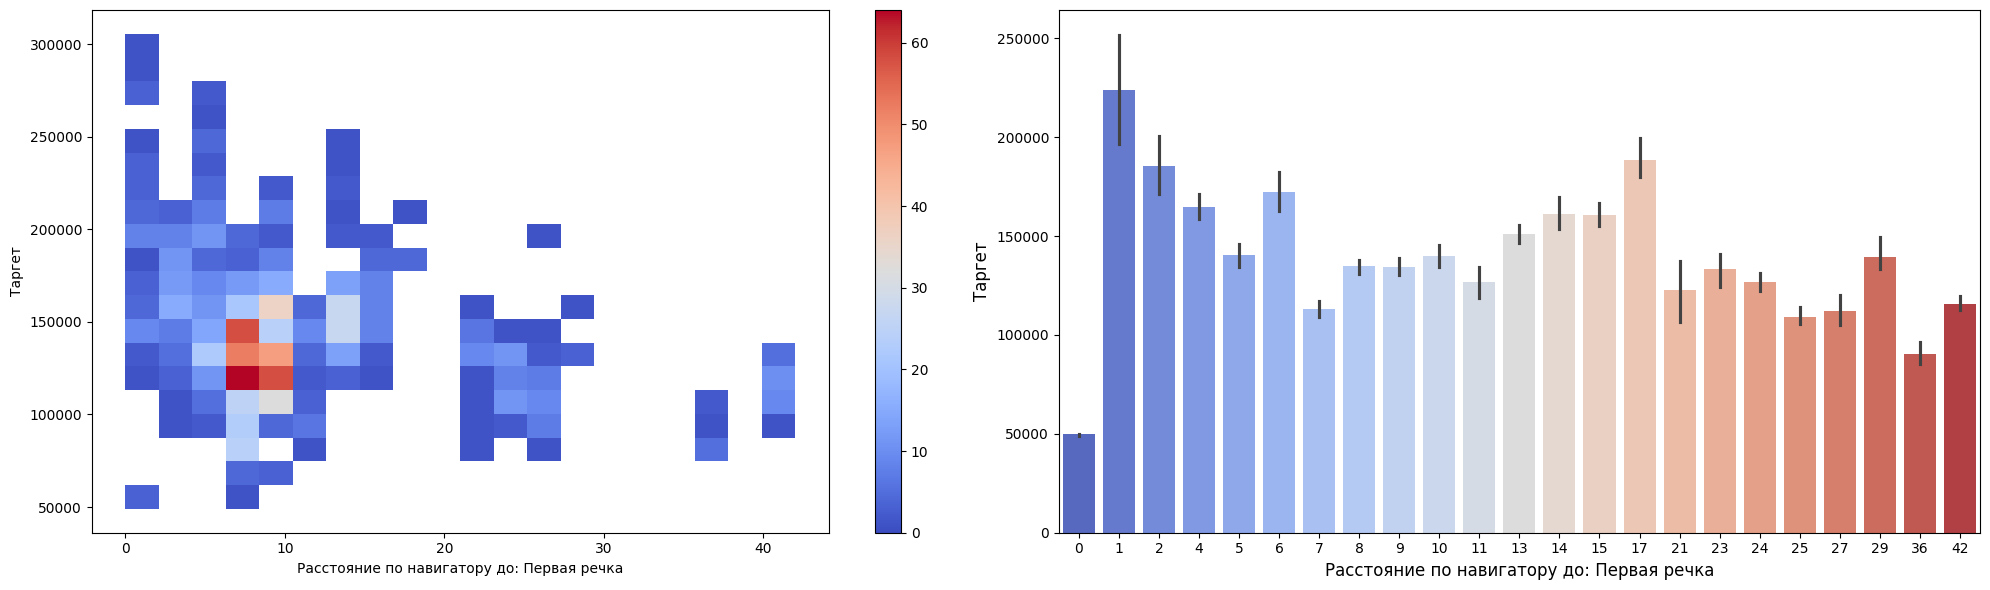

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


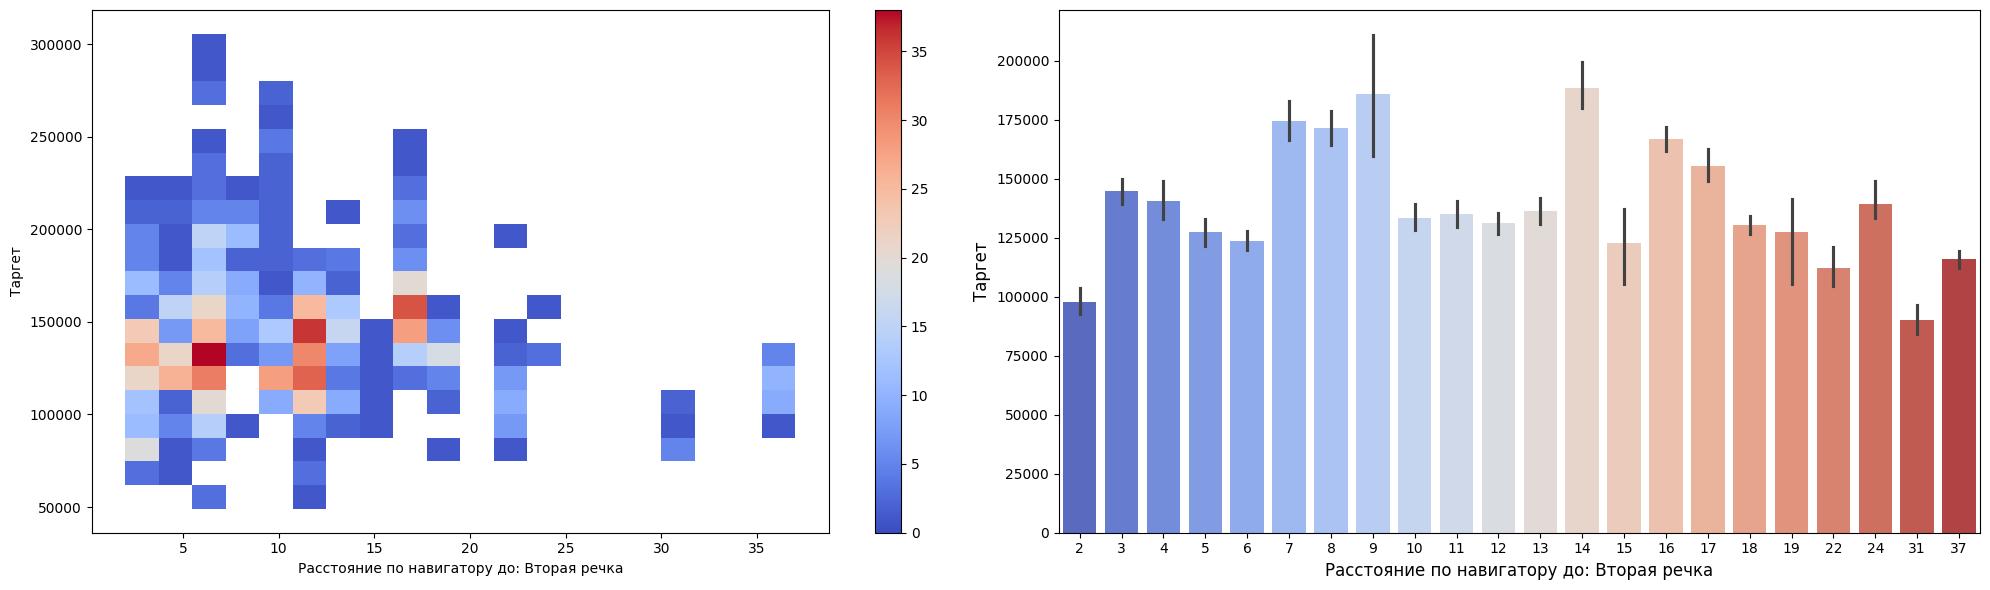

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


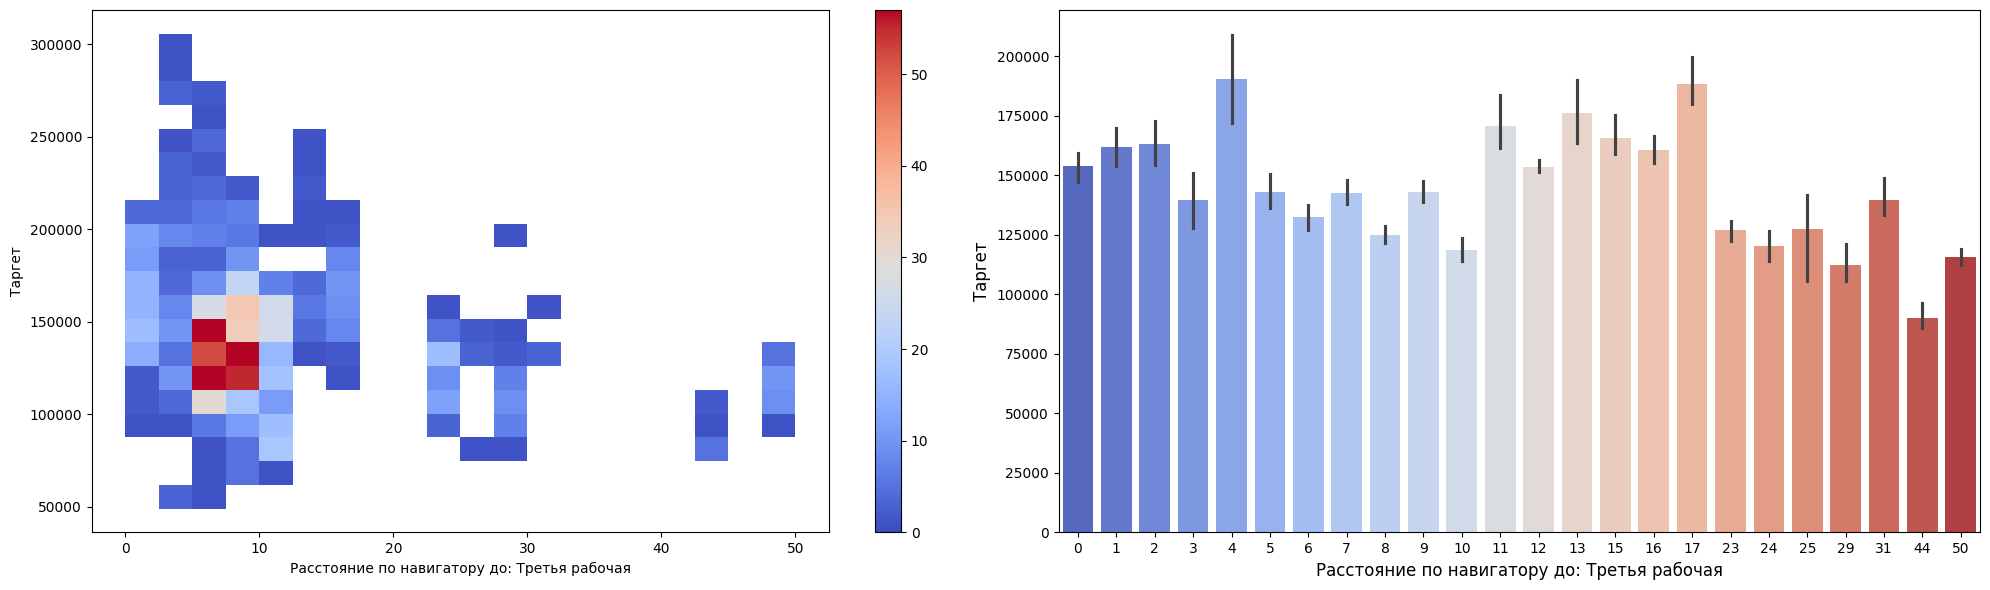

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


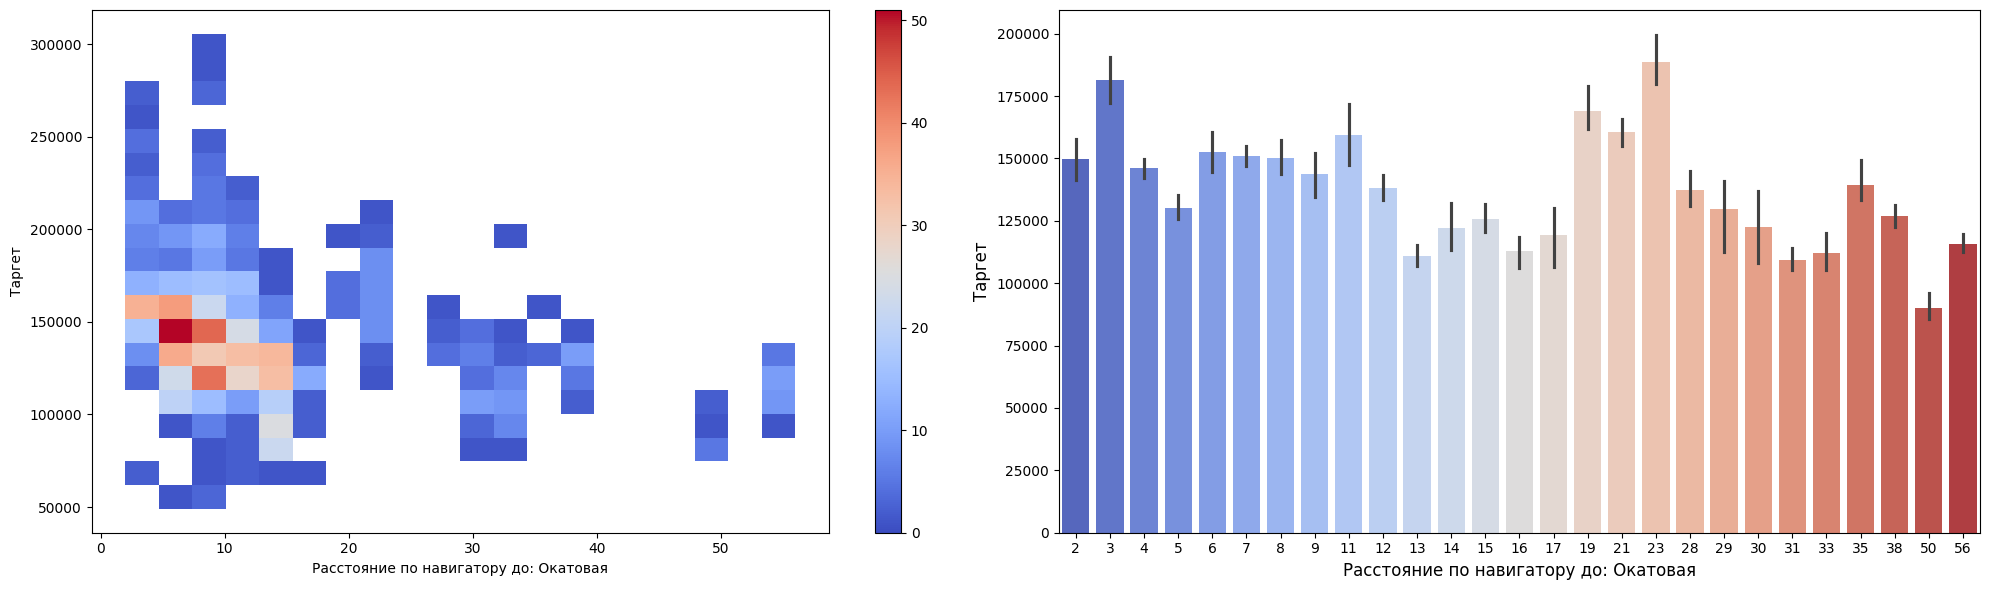

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


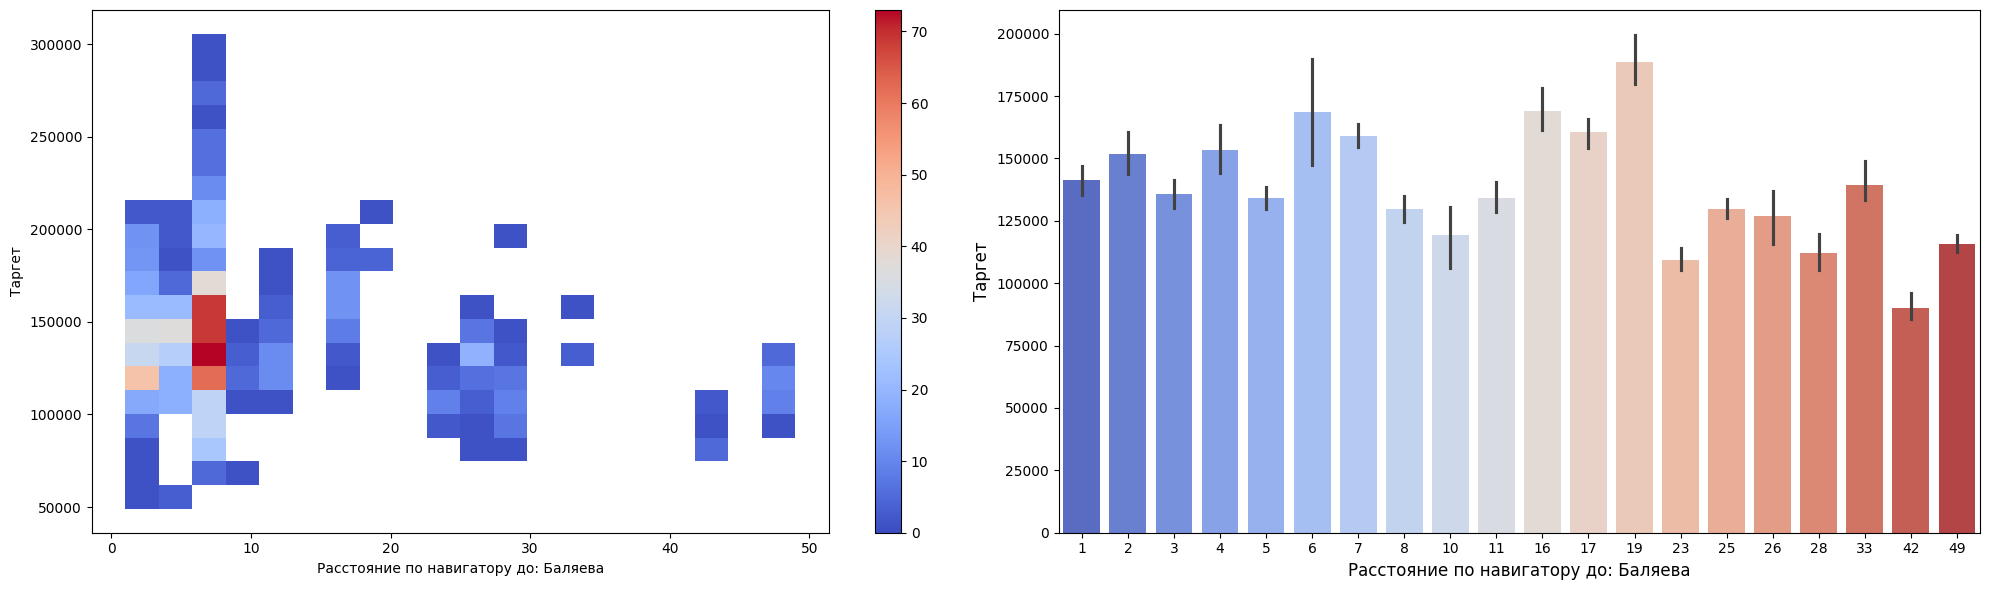

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


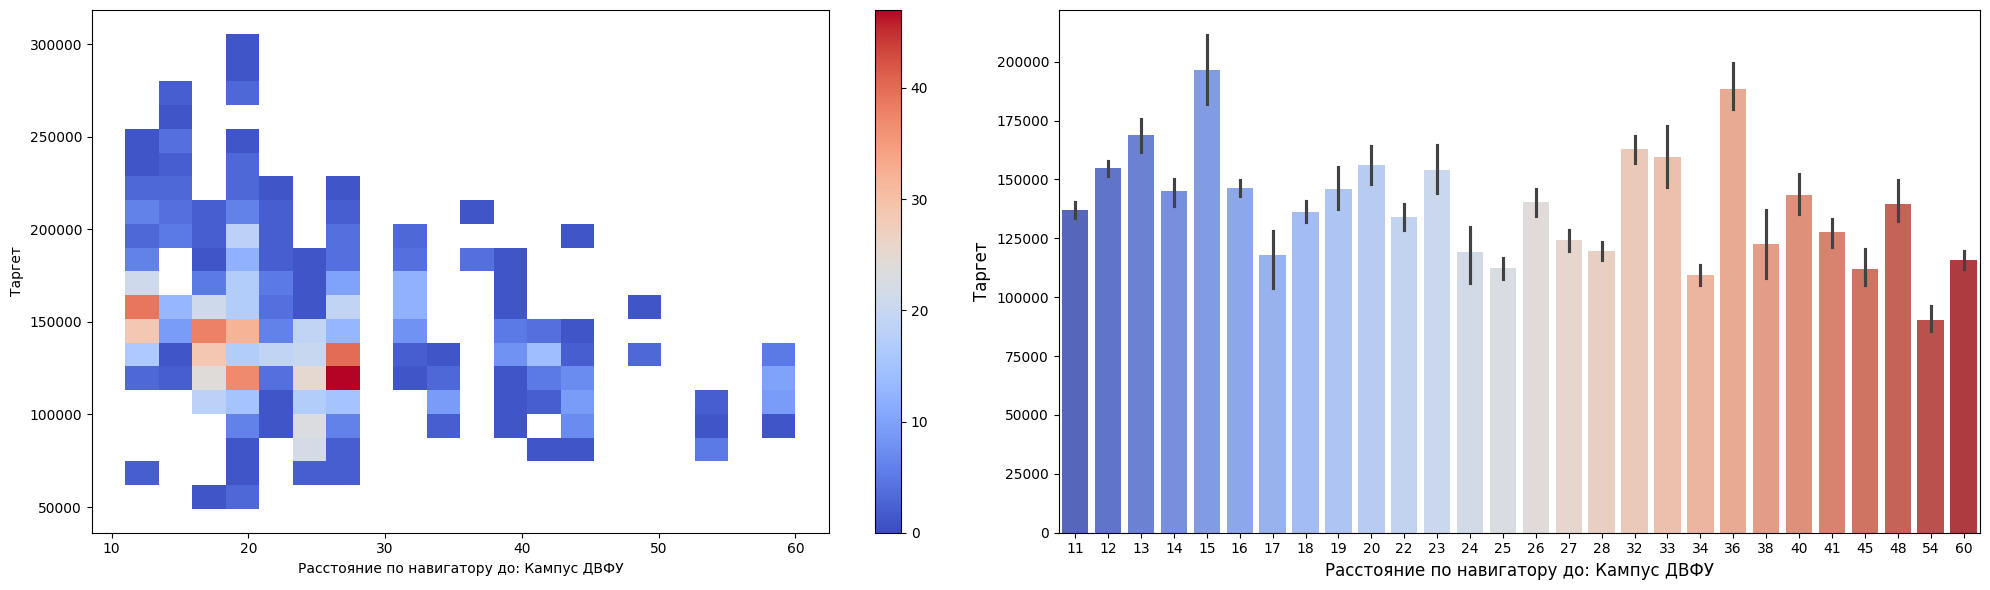

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


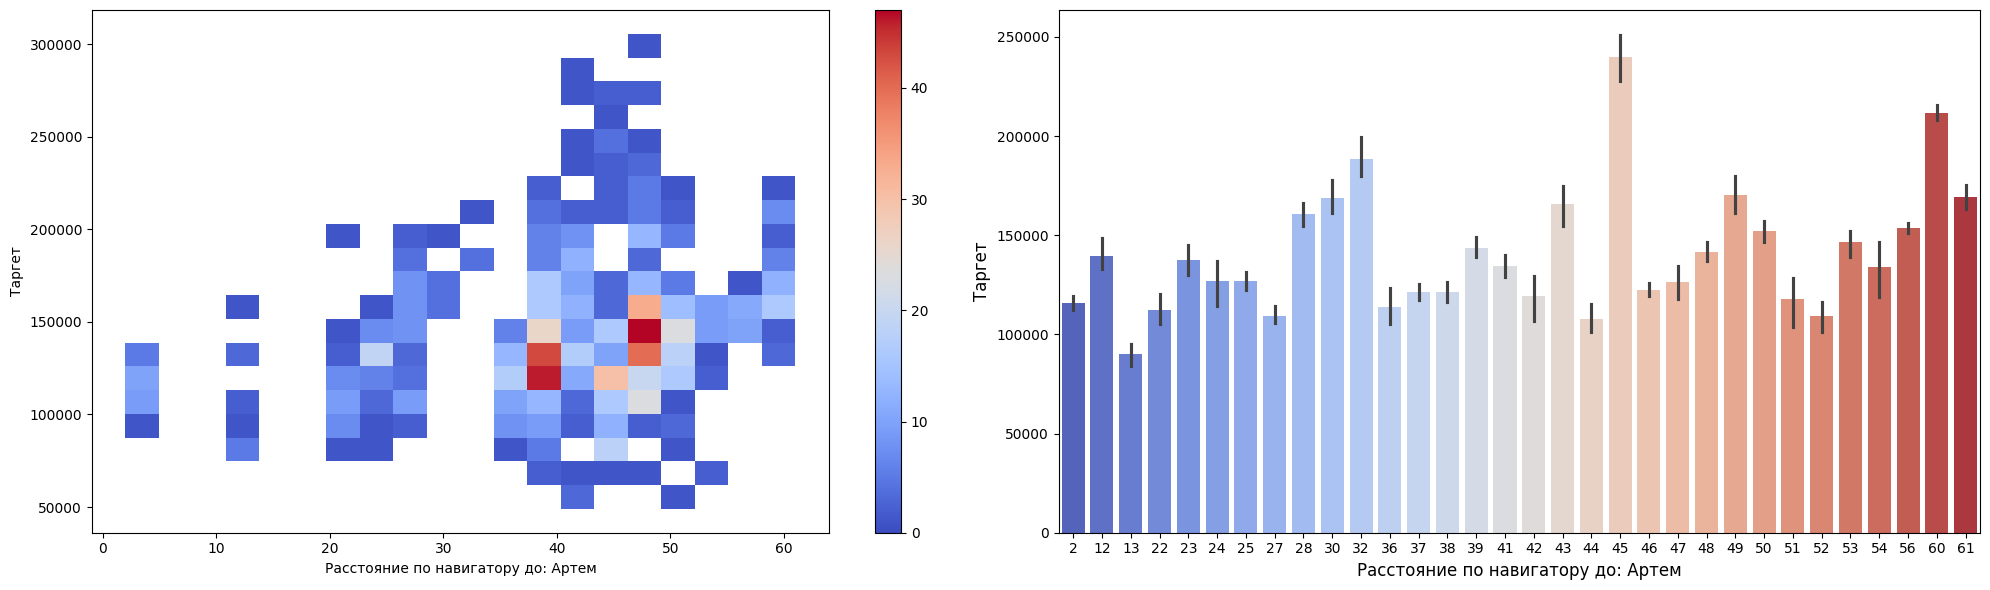

C:\Users\User\AppData\Local\Temp\ipykernel_14480\3237829724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset[col], y=dataset[target_column], palette='coolwarm', dodge=False, legend=False)


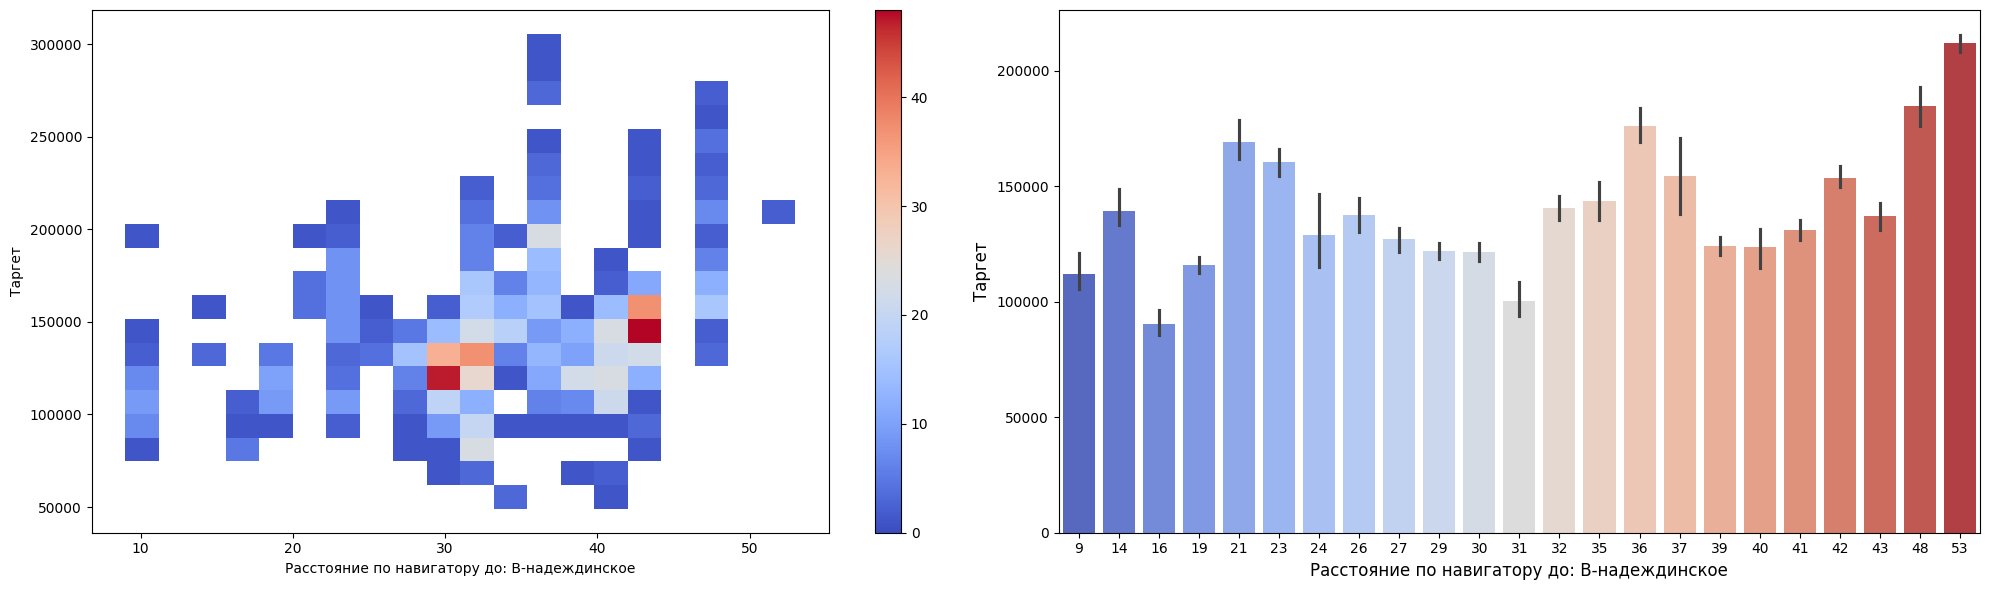

In [42]:
visualize_distance_columns(ds, distance, 'Таргет')

## Datatypes

In [43]:
ds.head()

,Регион,Населенный пункт,Группа компаний,ID проекта,Проект,Корпус,Класс недвижимости,Статус,Месяц,"Продано квартир, шт",...,Тип фасада,Есть квартиры без отделки,Есть квартиры с черновой отделкой,Есть квартиры с чистовой отделкой,Есть квартиры под ключ,Закрытая территория,Видеонаблюдение во дворе,Есть площадки для собак,Есть велопарковка,Внутренний двор без машин
4,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Август 2021,1.098612,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
7,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Ноябрь 2021,1.098612,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
8,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Декабрь 2021,1.098612,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
9,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Январь 2022,1.098612,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
10,Приморский край,Артем,СЗВОСХОД,11228,Восход,40376,Типовой,Строится,Февраль 2022,1.098612,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да


In [44]:
cols = ['Регион', 'Корпус', 'Проект', 'ID проекта', 'ЖК']
ds.drop(columns=cols,  axis=1, inplace=True)
ds.head() 

,Населенный пункт,Группа компаний,Класс недвижимости,Статус,Месяц,"Продано квартир, шт","Продано нежилых, шт","Продано нежилых, м2","Продано нежилых, руб","Продано машиномест, шт",...,Тип фасада,Есть квартиры без отделки,Есть квартиры с черновой отделкой,Есть квартиры с чистовой отделкой,Есть квартиры под ключ,Закрытая территория,Видеонаблюдение во дворе,Есть площадки для собак,Есть велопарковка,Внутренний двор без машин
4,Артем,СЗВОСХОД,Типовой,Строится,Август 2021,1.098612,0.693147,0.693147,0.693147,0.693147,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
7,Артем,СЗВОСХОД,Типовой,Строится,Ноябрь 2021,1.098612,0.693147,0.693147,0.693147,0.693147,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
8,Артем,СЗВОСХОД,Типовой,Строится,Декабрь 2021,1.098612,0.693147,0.693147,0.693147,0.693147,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
9,Артем,СЗВОСХОД,Типовой,Строится,Январь 2022,1.098612,0.693147,0.693147,0.693147,0.693147,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да
10,Артем,СЗВОСХОД,Типовой,Строится,Февраль 2022,1.098612,0.693147,0.693147,0.693147,0.693147,...,Панель,Да,Да,Да,Да,Да,Неизвестно,Нет,Да,Да


In [45]:
ds.to_excel('src/dataset_prepared.xlsx', index=False)